# Importing Packages

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# pd.reset_option("all")

import missingno as msno

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

from fancyimpute import KNN, IterativeImputer

import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# import geopandas as gpd

# Getting Data from Sources

## IHME Life Expectancy Data

In [64]:
life_exp = pd.read_csv('data/IHME/life_expectancy_2010_2019.csv', index_col=0, dtype={"geo_code": str})
life_exp.head()

,geo_code,year,life_expec
228,01001,2010,75.607833
234,01003,2010,77.707111
240,01005,2010,75.719796
246,01007,2010,73.576596
252,01009,2010,75.623747


## County Health Rankings

In [65]:
chr = pd.read_csv('data/County Health Rankings/chr_data.csv', index_col=0, dtype={"fipscode": str})
chr.head()

,fipscode,year,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,binge_drinking,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births,uninsured_adults,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,hospice_use,high_school_graduation,college_degrees,unemployment,children_in_poverty,income_inequality,inadequate_social_support,single_parent_households,violent_crime,homicides,air_pollution_particulate_matter_days,air_pollution_ozone_days,access_to_healthy_foods,liquor_store_density,smoking_during_pregnancy,motor_vehicle_crash_occupancy_rate,on_road_motor_vehicle_crash_related_er_visits,off_road_motor_vehicle_crash_related_er_visits,no_recent_dental_visit,did_not_get_needed_health_care,lead_poisoned_children,municipal_water_(wi),contaminants_in_municipal_water_(wi),excessive_drinking,mammography_screening,some_college,children_in_single_parent_households,access_to_recreational_facilities,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,illiteracy,median_household_income,high_housing_costs,children_eligible_for_free_lunch,driving_alone_to_work,population,pct_below_18_years_of_age,pct_65_and_older,pct_non_hispanic_black,pct_aian,pct_asian,pct_nhpi,pct_hispanic,pct_not_proficient_in_english,pct_female,pct_rural,fair_or_poor_health_(ny),adult_smoking_(fl),adult_smoking_(ny),overweight_or_obese_adults_(fl),fruit_and_vegetable_consumption_(fl),adults_engaging_in_moderate_physical_activity_(fl),obese_adults_(ny),no_leisure_time_physical_activity_(ny),excessive_drinking_(fl),binge_drinking_(ny),excessive_drinking_(ny),adults_who_have_personal_doctor_(fl),insured_adults_(fl),dental_visit_within_the_past_year_(ny),adequate_social/emotional_support_(fl),uninsured,limited_access_to_healthy_foods,fast_food_restaurants,health_care_costs,could_not_see_doctor_due_to_cost,dentists,ratio_of_pop_to_dentists,access_to_healthy_foods.1,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,child_mortality,infant_mortality,uninsured_children,access_to_parks,pct_non_hispanic_white,communicable_disease,coronary_heart_disease_hospitalizations,cerebrovascular_disease_hospitalizations,self_inflicted_injury_hospitalizations,cancer_incidence,breastfeeding,alcohol_related_hospitalizations,drug_arrests,childhood_immunizations,local_health_department_staffing,flu_immunizations_65+,dental_utilization,cervical_cancer_screening,colon_cancer_screening,cholesterol_screening,reading_proficiency,w_2_enrollment,poverty,older_adults_living_alone,hate_crimes,child_abuse,injury_hospitalizations,fall_fatalities_65+,year_structure_built,male_pop_0_17,male_pop_18_44,male_pop_45_64,male_pop_65+,total_male_pop,female_pop_0_17,female_pop_18_44,female_pop_45_64,female_pop_65+,total_female_pop,pop_growth,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,severe_housing_problems,long_commute_driving_alone,food_insecurity,drug_poisoning_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,drug_overdose_deaths_modeled,insufficient_sleep,residential_segregation_black/white,residential_segregation_non_white/white,disconnected_youth,firearm_fatalities,premature_death_white,premature_death_black,premature_death_hispanic,low_birthweight_white,low_birthweight_black,low_birthweight_hispanic,teen_births_white,teen_births_black,teen_births_hispanic,diabetes_monitoring_white,diabetes_monitoring_black,mammography_screening_white,mammography_screening_black,children_in_poverty_white,children_in_poverty_black,children_in_poverty_hispanic,driving_alone_to_work_white,driving_alone_to_work_black,driving_alone_to_work_hispanic,premature_age_adjusted_mortality_white,premature_age_adjusted_mortality_black,premature_age_adjusted_mortality_hispanic,child_mortality_w

In [66]:
chr_sorted = chr.sort_values(by=['year', 'fipscode'])
chr_sorted = chr_sorted.rename(columns={"fipscode": "geo_code"})

chr_sorted = chr_sorted.loc[~chr_sorted.geo_code.isin(['00000', '01000', '02000', '03000', '04000','05000', '06000', '07000', '08000', '09000', '10000', '11000', '12000', '13000','14000', '15000', '16000', '17000', '18000', '19000', '20000', '21000', '22000', '23000', '24000', '25000', '26000', '27000', '28000', '29000', '30000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '39000', '40000', '41000', '42000', '43000', '44000', '45000', '46000', '47000', '48000', '49000', '50000', '51000', '52000', '53000', '54000', '55000', '56000'])]

chr_sorted.head()

,geo_code,year,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,binge_drinking,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births,uninsured_adults,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,hospice_use,high_school_graduation,college_degrees,unemployment,children_in_poverty,income_inequality,inadequate_social_support,single_parent_households,violent_crime,homicides,air_pollution_particulate_matter_days,air_pollution_ozone_days,access_to_healthy_foods,liquor_store_density,smoking_during_pregnancy,motor_vehicle_crash_occupancy_rate,on_road_motor_vehicle_crash_related_er_visits,off_road_motor_vehicle_crash_related_er_visits,no_recent_dental_visit,did_not_get_needed_health_care,lead_poisoned_children,municipal_water_(wi),contaminants_in_municipal_water_(wi),excessive_drinking,mammography_screening,some_college,children_in_single_parent_households,access_to_recreational_facilities,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,illiteracy,median_household_income,high_housing_costs,children_eligible_for_free_lunch,driving_alone_to_work,population,pct_below_18_years_of_age,pct_65_and_older,pct_non_hispanic_black,pct_aian,pct_asian,pct_nhpi,pct_hispanic,pct_not_proficient_in_english,pct_female,pct_rural,fair_or_poor_health_(ny),adult_smoking_(fl),adult_smoking_(ny),overweight_or_obese_adults_(fl),fruit_and_vegetable_consumption_(fl),adults_engaging_in_moderate_physical_activity_(fl),obese_adults_(ny),no_leisure_time_physical_activity_(ny),excessive_drinking_(fl),binge_drinking_(ny),excessive_drinking_(ny),adults_who_have_personal_doctor_(fl),insured_adults_(fl),dental_visit_within_the_past_year_(ny),adequate_social/emotional_support_(fl),uninsured,limited_access_to_healthy_foods,fast_food_restaurants,health_care_costs,could_not_see_doctor_due_to_cost,dentists,ratio_of_pop_to_dentists,access_to_healthy_foods.1,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,child_mortality,infant_mortality,uninsured_children,access_to_parks,pct_non_hispanic_white,communicable_disease,coronary_heart_disease_hospitalizations,cerebrovascular_disease_hospitalizations,self_inflicted_injury_hospitalizations,cancer_incidence,breastfeeding,alcohol_related_hospitalizations,drug_arrests,childhood_immunizations,local_health_department_staffing,flu_immunizations_65+,dental_utilization,cervical_cancer_screening,colon_cancer_screening,cholesterol_screening,reading_proficiency,w_2_enrollment,poverty,older_adults_living_alone,hate_crimes,child_abuse,injury_hospitalizations,fall_fatalities_65+,year_structure_built,male_pop_0_17,male_pop_18_44,male_pop_45_64,male_pop_65+,total_male_pop,female_pop_0_17,female_pop_18_44,female_pop_45_64,female_pop_65+,total_female_pop,pop_growth,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,severe_housing_problems,long_commute_driving_alone,food_insecurity,drug_poisoning_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,drug_overdose_deaths_modeled,insufficient_sleep,residential_segregation_black/white,residential_segregation_non_white/white,disconnected_youth,firearm_fatalities,premature_death_white,premature_death_black,premature_death_hispanic,low_birthweight_white,low_birthweight_black,low_birthweight_hispanic,teen_births_white,teen_births_black,teen_births_hispanic,diabetes_monitoring_white,diabetes_monitoring_black,mammography_screening_white,mammography_screening_black,children_in_poverty_white,children_in_poverty_black,children_in_poverty_hispanic,driving_alone_to_work_white,driving_alone_to_work_black,driving_alone_to_work_hispanic,premature_age_adjusted_mortality_white,premature_age_adjusted_mortality_black,premature_age_adjusted_mortality_hispanic,child_mortality_w

In [67]:
chr_df = chr_sorted.merge(life_exp, on=['geo_code', 'year'], how='left')
chr_df['life_expectancy'] = chr_df['life_expectancy'].fillna(chr_df['life_expec'])
chr_df = chr_df.drop(columns=['life_expec'])
chr_df.head()

,geo_code,year,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,binge_drinking,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births,uninsured_adults,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,hospice_use,high_school_graduation,college_degrees,unemployment,children_in_poverty,income_inequality,inadequate_social_support,single_parent_households,violent_crime,homicides,air_pollution_particulate_matter_days,air_pollution_ozone_days,access_to_healthy_foods,liquor_store_density,smoking_during_pregnancy,motor_vehicle_crash_occupancy_rate,on_road_motor_vehicle_crash_related_er_visits,off_road_motor_vehicle_crash_related_er_visits,no_recent_dental_visit,did_not_get_needed_health_care,lead_poisoned_children,municipal_water_(wi),contaminants_in_municipal_water_(wi),excessive_drinking,mammography_screening,some_college,children_in_single_parent_households,access_to_recreational_facilities,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,illiteracy,median_household_income,high_housing_costs,children_eligible_for_free_lunch,driving_alone_to_work,population,pct_below_18_years_of_age,pct_65_and_older,pct_non_hispanic_black,pct_aian,pct_asian,pct_nhpi,pct_hispanic,pct_not_proficient_in_english,pct_female,pct_rural,fair_or_poor_health_(ny),adult_smoking_(fl),adult_smoking_(ny),overweight_or_obese_adults_(fl),fruit_and_vegetable_consumption_(fl),adults_engaging_in_moderate_physical_activity_(fl),obese_adults_(ny),no_leisure_time_physical_activity_(ny),excessive_drinking_(fl),binge_drinking_(ny),excessive_drinking_(ny),adults_who_have_personal_doctor_(fl),insured_adults_(fl),dental_visit_within_the_past_year_(ny),adequate_social/emotional_support_(fl),uninsured,limited_access_to_healthy_foods,fast_food_restaurants,health_care_costs,could_not_see_doctor_due_to_cost,dentists,ratio_of_pop_to_dentists,access_to_healthy_foods.1,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,child_mortality,infant_mortality,uninsured_children,access_to_parks,pct_non_hispanic_white,communicable_disease,coronary_heart_disease_hospitalizations,cerebrovascular_disease_hospitalizations,self_inflicted_injury_hospitalizations,cancer_incidence,breastfeeding,alcohol_related_hospitalizations,drug_arrests,childhood_immunizations,local_health_department_staffing,flu_immunizations_65+,dental_utilization,cervical_cancer_screening,colon_cancer_screening,cholesterol_screening,reading_proficiency,w_2_enrollment,poverty,older_adults_living_alone,hate_crimes,child_abuse,injury_hospitalizations,fall_fatalities_65+,year_structure_built,male_pop_0_17,male_pop_18_44,male_pop_45_64,male_pop_65+,total_male_pop,female_pop_0_17,female_pop_18_44,female_pop_45_64,female_pop_65+,total_female_pop,pop_growth,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,severe_housing_problems,long_commute_driving_alone,food_insecurity,drug_poisoning_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,drug_overdose_deaths_modeled,insufficient_sleep,residential_segregation_black/white,residential_segregation_non_white/white,disconnected_youth,firearm_fatalities,premature_death_white,premature_death_black,premature_death_hispanic,low_birthweight_white,low_birthweight_black,low_birthweight_hispanic,teen_births_white,teen_births_black,teen_births_hispanic,diabetes_monitoring_white,diabetes_monitoring_black,mammography_screening_white,mammography_screening_black,children_in_poverty_white,children_in_poverty_black,children_in_poverty_hispanic,driving_alone_to_work_white,driving_alone_to_work_black,driving_alone_to_work_hispanic,premature_age_adjusted_mortality_white,premature_age_adjusted_mortality_black,premature_age_adjusted_mortality_hispanic,child_mortality_w

In [74]:
chr_df['pct_female_pop_0_17'] = chr_df['female_pop_0_17'] / chr_df['total_female_pop']
chr_df['pct_female_pop_18_44'] = chr_df['female_pop_18_44'] / chr_df['total_female_pop']
chr_df["pct_female_pop_45_64"] = chr_df["female_pop_45_64"] / chr_df["total_female_pop"]
chr_df["pct_female_pop_65+"] = chr_df['female_pop_65+'] / chr_df["total_female_pop"]

chr_df["pct_male_pop_0_17"] = chr_df["male_pop_0_17"] / chr_df["total_male_pop"]
chr_df["pct_male_pop_18_44"] = chr_df["male_pop_18_44"] / chr_df["total_male_pop"]
chr_df["pct_male_pop_45_64"] = chr_df["male_pop_45_64"] / chr_df["total_male_pop"]
chr_df["pct_male_pop_65+"] = chr_df["male_pop_65+"] / chr_df["total_male_pop"]


chr_df = chr_df.drop(columns=['total_male_pop', 'total_female_pop', 'female_pop_0_17', 'female_pop_18_44', 'female_pop_45_64', 'female_pop_65+', 'male_pop_0_17', 'male_pop_18_44', 'male_pop_45_64', 'male_pop_65+'])
chr_df.head()

,geo_code,year,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,binge_drinking,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births,uninsured_adults,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,hospice_use,high_school_graduation,college_degrees,unemployment,children_in_poverty,income_inequality,inadequate_social_support,single_parent_households,violent_crime,homicides,air_pollution_particulate_matter_days,air_pollution_ozone_days,access_to_healthy_foods,liquor_store_density,smoking_during_pregnancy,motor_vehicle_crash_occupancy_rate,on_road_motor_vehicle_crash_related_er_visits,off_road_motor_vehicle_crash_related_er_visits,no_recent_dental_visit,did_not_get_needed_health_care,lead_poisoned_children,municipal_water_(wi),contaminants_in_municipal_water_(wi),excessive_drinking,mammography_screening,some_college,children_in_single_parent_households,access_to_recreational_facilities,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,illiteracy,median_household_income,high_housing_costs,children_eligible_for_free_lunch,driving_alone_to_work,population,pct_below_18_years_of_age,pct_65_and_older,pct_non_hispanic_black,pct_aian,pct_asian,pct_nhpi,pct_hispanic,pct_not_proficient_in_english,pct_female,pct_rural,fair_or_poor_health_(ny),adult_smoking_(fl),adult_smoking_(ny),overweight_or_obese_adults_(fl),fruit_and_vegetable_consumption_(fl),adults_engaging_in_moderate_physical_activity_(fl),obese_adults_(ny),no_leisure_time_physical_activity_(ny),excessive_drinking_(fl),binge_drinking_(ny),excessive_drinking_(ny),adults_who_have_personal_doctor_(fl),insured_adults_(fl),dental_visit_within_the_past_year_(ny),adequate_social/emotional_support_(fl),uninsured,limited_access_to_healthy_foods,fast_food_restaurants,health_care_costs,could_not_see_doctor_due_to_cost,dentists,ratio_of_pop_to_dentists,access_to_healthy_foods.1,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,child_mortality,infant_mortality,uninsured_children,access_to_parks,pct_non_hispanic_white,communicable_disease,coronary_heart_disease_hospitalizations,cerebrovascular_disease_hospitalizations,self_inflicted_injury_hospitalizations,cancer_incidence,breastfeeding,alcohol_related_hospitalizations,drug_arrests,childhood_immunizations,local_health_department_staffing,flu_immunizations_65+,dental_utilization,cervical_cancer_screening,colon_cancer_screening,cholesterol_screening,reading_proficiency,w_2_enrollment,poverty,older_adults_living_alone,hate_crimes,child_abuse,injury_hospitalizations,fall_fatalities_65+,year_structure_built,pop_growth,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,severe_housing_problems,long_commute_driving_alone,food_insecurity,drug_poisoning_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,drug_overdose_deaths_modeled,insufficient_sleep,residential_segregation_black/white,residential_segregation_non_white/white,disconnected_youth,firearm_fatalities,premature_death_white,premature_death_black,premature_death_hispanic,low_birthweight_white,low_birthweight_black,low_birthweight_hispanic,teen_births_white,teen_births_black,teen_births_hispanic,diabetes_monitoring_white,diabetes_monitoring_black,mammography_screening_white,mammography_screening_black,children_in_poverty_white,children_in_poverty_black,children_in_poverty_hispanic,driving_alone_to_work_white,driving_alone_to_work_black,driving_alone_to_work_hispanic,premature_age_adjusted_mortality_white,premature_age_adjusted_mortality_black,premature_age_adjusted_mortality_hispanic,child_mortality_white,child_mortality_black,child_mortality_hispanic,infant_mortality_white,infant_mortality_black,infant_mortality_hispanic,median_household_income_white,

## US Census Bureau

In [68]:
census = pd.read_csv('data/census_revised_data_091024.csv', index_col=0, dtype={"geo_code": str})
census = census.loc[census.state_code!='PR']
census.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english,uninsured,uninsured_children,uninsured_adults,long_commute_driving_alone,driving_alone_to_work,income_inequality,population,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_female,older_adults_living_alone,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,disconnected_youth,pct_hispanic,pct_non_hispanic_white,pct_non_hispanic_black,pct_indigenous,pct_asian,pct_nhpi,severe_housing_problems,homeownership,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,severe_housing_cost_burden,pct_households_with_high_housing_costs,high_school_completion,college_completion,some_college,children_in_single_parent_households,single_parent_households,gini_index,median_hh_income,poverty,children_in_poverty,children_eligible_for_free_or_reduced_lunch,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births,gender_pay_gap,mobility_index_std
0,2010,17127,Illinois,IL,"Massac County, Illinois",Massac,0.002624,NaN,NaN,NaN,15.624765,0.865234,4.229339,15425,41.8,0.230146,0.311313,0.276499,0.182042,0.237822,0.315818,0.286946,0.159414,0.223235,0.307256,0.267094,0.202415,0.526224,NaN,0.018199,0.059068,0.095312,0.018507,0.117212,0.120913,0.009099,0.038402,0.068785,0.213603,0.137107,0.057372,0.046422,6.110628,0.235349,0.225632,0.259870,0.121993,0.157156,NaN,0.018541,0.902626,0.043177,0.002075,0.003630,0.000000,0.070713,0.802479,0.007469,0.003814,0.153291,0.153291,0.849575,0.141457,0.495562,0.222385,0.087717,0.396,41077.0,NaN,NaN,0.211972,0.064,0.013,0.046,0.001,14.184397,55.627177,15.96
1,2010,17129,Illinois,IL,"Menard County, Illinois",Menard,0.001754,NaN,NaN,NaN,40.129367,0.788037,3.822340,12702,42.3,0.236026,0.308849,0.303102,0.152023,0.248227,0.311251,0.303836,0.136686,0.224377,0.306556,0.302401,0.166667,0.511573,NaN,0.044374,0.060124,0.055581,0.031955,0.089505,0.058761,0.020445,0.089050,0.067545,0.222778,0.076177,0.128729,0.054975,3.507234,0.348932,0.165834,0.268211,0.099500,0.117522,NaN,0.008109,0.990159,0.000236,0.000236,0.000000,0.000000,0.069027,0.825158,0.009098,0.000000,0.102008,0.102008,0.903002,0.241528,0.521947,0.232488,0.110759,0.377,56230.0,NaN,NaN,0.110807,0.040,0.064,0.009,0.002,25.229358,86.622807,13.96
2,2010,17131,Illinois,IL,"Mercer County, Illinois",Mercer,0.005386,NaN,NaN,NaN,39.743189,0.809647,3.526119,16551,43.0,0.229412,0.299801,0.297565,0.173222,0.236003,0.302449,0.306632,0.154916,0.223053,0.297246,0.288818,0.190883,0.508972,NaN,0.054232,0.097211,0.157907,0.025141,0.097091,0.062373,0.017000,0.049204,0.056267,0.219322,0.056866,0.061415,0.045972,6.177693,0.287322,0.158386,0.227822,0.141626,0.184844,NaN,0.015407,0.970999,0.003625,0.002115,0.002115,0.000785,0.059312,0.799475,0.002769,0.000000,0.136908,0.136908,0.887152,0.145053,0.479537,0.263701,0.149228,0.383,50909.0,NaN,NaN,0.159477,0.078,0.023,0.012,0.000,67.307692,65.874805,11.00
3,2010,17133,Illinois,IL,"Monroe County, Illinois",Monroe,0.008292,NaN,NaN,NaN,45.224157,0.816812,3.728533,32431,40.1,0.248312,0.328266,0.285098,0.138324,0.261490,0.329841,0.292173,0.116495,0.235423,0.326726,0.278178,0.159673,0.505566,NaN,0.019064,0.095858,0.120540,0.035977,0.087731,0.065499,0.033825,0.080739,0.089643,0.205582

In [69]:
census_sorted = census.sort_values(by=['year', 'geo_code'])
census_sorted.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english,uninsured,uninsured_children,uninsured_adults,long_commute_driving_alone,driving_alone_to_work,income_inequality,population,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_female,older_adults_living_alone,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,disconnected_youth,pct_hispanic,pct_non_hispanic_white,pct_non_hispanic_black,pct_indigenous,pct_asian,pct_nhpi,severe_housing_problems,homeownership,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,severe_housing_cost_burden,pct_households_with_high_housing_costs,high_school_completion,college_completion,some_college,children_in_single_parent_households,single_parent_households,gini_index,median_hh_income,poverty,children_in_poverty,children_eligible_for_free_or_reduced_lunch,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births,gender_pay_gap,mobility_index_std
1231,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,NaN,31.206695,0.868566,3.930128,53155,36.2,0.277020,0.360926,0.248048,0.114006,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635,0.515003,NaN,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,6.207614,0.293291,0.169221,0.290703,0.115690,0.131096,NaN,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.217477,0.501062,0.295363,0.179785,0.405,53255.0,NaN,NaN,0.161946,0.068,0.037,0.030,0.002,47.513321,66.048439,16.51
1232,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,NaN,33.724273,0.835134,4.214440,175791,41.0,0.233084,0.322036,0.279969,0.164912,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958,0.511340,36.7,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,6.560518,0.315219,0.175586,0.268785,0.134832,0.105578,NaN,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.268221,0.576810,0.285221,0.138206,0.439,50147.0,0.130669,0.193264,0.204360,0.086,0.027,0.054,0.004,31.854171,68.766137,21.87
1233,2010,01005,Alabama,AL,"Barbour County, Alabama",Barbour,0.021339,NaN,NaN,NaN,26.762889,0.789877,5.835112,27699,38.0,0.224918,0.367450,0.270226,0.137406,0.217445,0.411821,0.261057,0.109678,0.233310,0.317621,0.280524,0.168544,0.471028,NaN,0.040973,0.063478,0.282571,0.012716,0.124836,0.079221,0.008174,0.037945,0.039156,0.150066,0.058432,0.062872,0.039560,9.589416,0.265819,0.156524,0.213442,0.103441,0.260773,NaN,0.045958,0.472111,0.464674,0.003141,0.001661,0.000108,0.158040,0.680449,0.013783,0.003675,0.171885,0.171885,0.718629,0.135124,0.364850,0.519583,0.225625,0.464,33219.0,NaN,NaN,0.362199,0.074,0.070,0.026,0.000,87.486157,74.681632,20.08
1234,2010,01007,Alabama,AL,"Bibb County, Alabama",Bibb,0.008245,NaN,NaN,NaN,43.250507,0.849911,4.332317,22610,38.3,0.234321,0.379832,0.261477,0.124370,0.242805,0.400756,0.259086,0.097352,0.224445,0.355475,0.264261,0.155819,0.462096,NaN,0.038191,0.106426,0.180059,0.022711,0.137081,0.104288,0.008046,0.057236

In [70]:
census_2020 = census_sorted.loc[census_sorted.year==2020]
census_2022_geo = census_2020[["geo_code", "state", "state_code", "geo_full_name", "geo_name"]]
census_2023_geo = census_2022_geo.copy()
census_2023_geo['year'] = 2023

census_2024_geo = census_2022_geo.copy()
census_2024_geo['year'] = 2024

census_sorted = pd.concat([census_sorted, census_2023_geo, census_2024_geo], axis=0)
census_sorted.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english,uninsured,uninsured_children,uninsured_adults,long_commute_driving_alone,driving_alone_to_work,income_inequality,population,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_female,older_adults_living_alone,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,disconnected_youth,pct_hispanic,pct_non_hispanic_white,pct_non_hispanic_black,pct_indigenous,pct_asian,pct_nhpi,severe_housing_problems,homeownership,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,severe_housing_cost_burden,pct_households_with_high_housing_costs,high_school_completion,college_completion,some_college,children_in_single_parent_households,single_parent_households,gini_index,median_hh_income,poverty,children_in_poverty,children_eligible_for_free_or_reduced_lunch,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births,gender_pay_gap,mobility_index_std
1231,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,NaN,31.206695,0.868566,3.930128,53155.0,36.2,0.277020,0.360926,0.248048,0.114006,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635,0.515003,NaN,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,6.207614,0.293291,0.169221,0.290703,0.115690,0.131096,NaN,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.217477,0.501062,0.295363,0.179785,0.405,53255.0,NaN,NaN,0.161946,0.068,0.037,0.030,0.002,47.513321,66.048439,16.51
1232,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,NaN,33.724273,0.835134,4.214440,175791.0,41.0,0.233084,0.322036,0.279969,0.164912,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958,0.511340,36.7,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,6.560518,0.315219,0.175586,0.268785,0.134832,0.105578,NaN,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.268221,0.576810,0.285221,0.138206,0.439,50147.0,0.130669,0.193264,0.204360,0.086,0.027,0.054,0.004,31.854171,68.766137,21.87
1233,2010,01005,Alabama,AL,"Barbour County, Alabama",Barbour,0.021339,NaN,NaN,NaN,26.762889,0.789877,5.835112,27699.0,38.0,0.224918,0.367450,0.270226,0.137406,0.217445,0.411821,0.261057,0.109678,0.233310,0.317621,0.280524,0.168544,0.471028,NaN,0.040973,0.063478,0.282571,0.012716,0.124836,0.079221,0.008174,0.037945,0.039156,0.150066,0.058432,0.062872,0.039560,9.589416,0.265819,0.156524,0.213442,0.103441,0.260773,NaN,0.045958,0.472111,0.464674,0.003141,0.001661,0.000108,0.158040,0.680449,0.013783,0.003675,0.171885,0.171885,0.718629,0.135124,0.364850,0.519583,0.225625,0.464,33219.0,NaN,NaN,0.362199,0.074,0.070,0.026,0.000,87.486157,74.681632,20.08
1234,2010,01007,Alabama,AL,"Bibb County, Alabama",Bibb,0.008245,NaN,NaN,NaN,43.250507,0.849911,4.332317,22610.0,38.3,0.234321,0.379832,0.261477,0.124370,0.242805,0.400756,0.259086,0.097352,0.224445,0.355475,0.264261,0.155819,0.462096,NaN,0.038191,0.106426,0.180059,0.022711,0.137081,0.104288,0.008046,

In [72]:
census_sorted.year.value_counts()

year
2022    3144
2010    3143
2021    3143
2011    3142
2012    3142
2013    3142
2020    3142
2023    3142
2024    3142
2014    3141
2015    3141
2016    3141
2017    3141
2018    3141
2019    3141
Name: count, dtype: int64

In [75]:
merge = census_sorted.merge(chr_df, on=['year', 'geo_code'], how='outer')
merge.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_female_x,older_adults_living_alone_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,disconnected_youth_x,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,median_hh_income,poverty_x,children_in_poverty_x,children_eligible_for_free_or_reduced_lunch,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,binge_drinking,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births_y,uninsured_adults_y,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,hospice_use,high_school_graduation,college_degrees,unemployment,children_in_poverty_y,income_inequality_y,inadequate_social_support,single_parent_households_y,violent_crime,homicides,air_pollution_particulate_matter_days,air_pollution_ozone_days,access_to_healthy_foods,liquor_store_density,smoking_during_pregnancy,motor_vehicle_crash_occupancy_rate,on_road_motor_vehicle_crash_related_er_visits,off_road_motor_vehicle_crash_related_er_visits,no_recent_dental_visit,did_not_get_needed_health_care,lead_poisoned_children,municipal_water_(wi),contaminants_in_municipal_water_(wi),excessive_drinking,mammography_screening,some_college_y,children_in_single_parent_households_y,access_to_recreational_facilities,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,illiteracy,median_household_income,high_housing_costs,children_eligible_for_free_lunch,driving_alone_to_work_y,population_y,pct_below_18_years_of_age,pct_65_and_older_y,pct_non_hispanic_black_y,pct_aian,pct_asian_y,pct_nhpi_y,pct_hispanic_y,pct_not_proficient_in_english_y,pct_female_y,pct_rural,fair_or_poor_health_(ny),adult_smoking_(fl),adult_smoking_(ny),overweight_or_obese_adults_(fl),fruit_and_vegetable_consumption_(fl),adults_engaging_in_moderate_physical_activity_(fl),obese_adults_(ny),no_leisure_time_physical_activity_(ny),excessive_drinking_(fl),binge_drinking_(ny),excessive_drinking_(ny),adults_who_have_personal_doctor_(fl),insured_adults_(fl),dental_visit_within_the_past_year_(ny),adequate_social/emotional_support_(fl),uninsured_y,limited_access_to_healthy_foods,fast_food_restaurants,health_care_costs,could_not_see_doctor_due_to_cost,dentists,ratio_of_pop_to_dentists,access_to_healthy_foods.1,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,child_mortality,infant_mortality,uninsured_children_y,access_

# Connecting Census with CHR Data

In [76]:
merge['pct_not_proficient_in_english_x'] = merge['pct_not_proficient_in_english_x'].fillna(merge['pct_not_proficient_in_english_y'])
merge['uninsured_x'] = merge['uninsured_x'].fillna(merge['uninsured_y'])
merge['uninsured_children_x'] = merge['uninsured_children_x'].fillna(merge['uninsured_children_y'])
merge['uninsured_adults_x'] = merge['uninsured_adults_x'].fillna(merge['uninsured_adults_y'])
merge['long_commute_driving_alone_x'] = merge['long_commute_driving_alone_x'].fillna(merge['long_commute_driving_alone_y'])
merge['driving_alone_to_work_x'] = merge['driving_alone_to_work_x'].fillna(merge['driving_alone_to_work_y'])
merge['population_x'] = merge['population_x'].fillna(merge['population_y'])
merge['pct_under_18'] = merge['pct_under_18'].fillna(merge['pct_below_18_years_of_age'])
merge['pct_65_and_older_x'] = merge['pct_65_and_older_x'].fillna(merge['pct_65_and_older_y'])
merge['pct_male_pop_0_17_x'] = merge['pct_male_pop_0_17_x'].fillna(merge['pct_male_pop_0_17_y'])
merge['pct_male_pop_18_44_x'] = merge['pct_male_pop_18_44_x'].fillna(merge['pct_male_pop_18_44_y'])
merge['pct_male_pop_45_64_x'] = merge['pct_male_pop_45_64_x'].fillna(merge['pct_male_pop_45_64_y'])
merge['pct_male_pop_65+_x'] = merge['pct_male_pop_65+_x'].fillna(merge['pct_male_pop_65+_y'])
merge['pct_female_pop_0_17_x'] = merge['pct_female_pop_0_17_x'].fillna(merge['pct_female_pop_0_17_y'])
merge['pct_female_pop_18_44_x'] = merge['pct_female_pop_18_44_x'].fillna(merge['pct_female_pop_18_44_y'])
merge['pct_female_pop_45_64_x'] = merge['pct_female_pop_45_64_x'].fillna(merge['pct_female_pop_45_64_y'])
merge['pct_female_pop_65+_x'] = merge['pct_female_pop_65+_x'].fillna(merge['pct_female_pop_65+_y'])
merge['pct_female_x'] = merge['pct_female_x'].fillna(merge['pct_female_y'])
merge['pct_hispanic_x'] = merge['pct_hispanic_x'].fillna(merge['pct_hispanic_y'])
merge['pct_non_hispanic_white_x'] = merge['pct_non_hispanic_white_x'].fillna(merge['pct_non_hispanic_white_y'])
merge['pct_non_hispanic_black_x'] = merge['pct_non_hispanic_black_x'].fillna(merge['pct_non_hispanic_black_y'])
merge['pct_indigenous'] = merge['pct_indigenous'].fillna(merge['pct_aian'])
merge['pct_asian_x'] = merge['pct_asian_x'].fillna(merge['pct_asian_y'])
merge['pct_nhpi_x'] = merge['pct_nhpi_x'].fillna(merge['pct_nhpi_y'])
merge['high_school_completion_x'] = merge['high_school_completion_x'].fillna(merge['high_school_completion_y'])
merge['college_completion'] = merge['college_completion'].fillna(merge['college_degrees'])
merge['some_college_x'] = merge['some_college_x'].fillna(merge['some_college_y'])
merge['disconnected_youth_x'] = merge['disconnected_youth_x'].fillna(merge['disconnected_youth_y'])
merge['children_in_single_parent_households_x'] = merge['children_in_single_parent_households_x'].fillna(merge['children_in_single_parent_households_y'])
merge['older_adults_living_alone_x'] = merge['older_adults_living_alone_x'].fillna(merge['older_adults_living_alone_y'])
merge['median_household_income'] = merge['median_household_income'].fillna(merge['median_hh_income'])
merge['income_inequality_x'] = merge['income_inequality_x'].fillna(merge['income_inequality_y'])
merge['unemployment_rate'] = merge['unemployment_rate'] / 100
merge['unemployment_rate'] = merge['unemployment_rate'].fillna(merge['unemployment'])
merge['severe_housing_problems_x'] = merge['severe_housing_problems_x'].fillna(merge['severe_housing_problems_y'])
merge['homeownership_x'] = merge['homeownership_x'].fillna(merge['homeownership_y'])
merge['pct_households_with_high_housing_costs_x'] = merge['pct_households_with_high_housing_costs_x'].fillna(merge['pct_households_with_high_housing_costs_y'])
merge['pct_households_with_overcrowding_x'] = merge['pct_households_with_overcrowding_x'].fillna(merge['pct_households_with_overcrowding_y'])
merge['pct_households_with_lack_of_kitchen_or_plumbing_facilities_x'] = merge['pct_households_with_lack_of_kitchen_or_plumbing_facilities_x'].fillna(merge['pct_households_with_lack_of_kitchen_or_plumbing_facilities_y'])
merge['severe_housing_cost_burden_x'] = merge['severe_housing_cost_burden_x'].fillna(merge['severe_housing_cost_burden_y'])
merge['single_parent_households_x'] = merge['single_parent_households_x'].fillna(merge['children_in_single_parent_households_y'])
merge['poverty_x'] = merge['poverty_x'].fillna(merge['poverty_y'])
merge['children_in_poverty_x'] = merge['children_in_poverty_x'].fillna(merge['children_in_poverty_y'])
merge['children_eligible_for_free_lunch'] = merge['children_eligible_for_free_lunch'].fillna(merge['children_eligible_for_free_or_reduced_lunch'])
merge['teen_births_x'] = merge['teen_births_x'].fillna(merge['teen_births_y'])
merge['gender_pay_gap_x'] = merge['gender_pay_gap_x'].fillna(merge['gender_pay_gap_y'])


In [77]:
merged = merge.drop(columns=['pct_not_proficient_in_english_y',
                             'uninsured_y',
                             'uninsured_children_y',
                             'uninsured_adults_y',
                             'long_commute_driving_alone_y',
                             'driving_alone_to_work_y',
                             'population_y',
                             'pct_below_18_years_of_age',
                             'pct_65_and_older_y',
                             'pct_male_pop_0_17_y',
                             'pct_male_pop_18_44_y',
                             'pct_male_pop_45_64_y',
                             'pct_male_pop_65+_y',
                             'pct_female_pop_0_17_y',
                             'pct_female_pop_18_44_y',
                             'pct_female_pop_45_64_y',
                             'pct_female_pop_65+_y',
                             'pct_hispanic_y',
                             'pct_non_hispanic_white_y',
                             'pct_non_hispanic_black_y',
                             'pct_asian_y',
                             'pct_nhpi_y',
                             'high_school_completion_y',
                             'college_degrees',
                             'some_college_y',
                             'disconnected_youth_y',
                             'children_in_single_parent_households_y',
                             'single_parent_households_y',
                             'older_adults_living_alone_y',
                             'median_hh_income',
                             'income_inequality_y',
                             'unemployment',
                             'severe_housing_problems_y',
                             'homeownership_y',
                             'pct_households_with_high_housing_costs_y',
                             'pct_households_with_overcrowding_y',
                             'pct_households_with_lack_of_kitchen_or_plumbing_facilities_y',
                             'severe_housing_cost_burden_y',
                             'poverty_y',
                             'children_in_poverty_y',
                             'children_eligible_for_free_or_reduced_lunch',
                             'teen_births_y',
                             'gender_pay_gap_y',
                             'pct_female_y'])

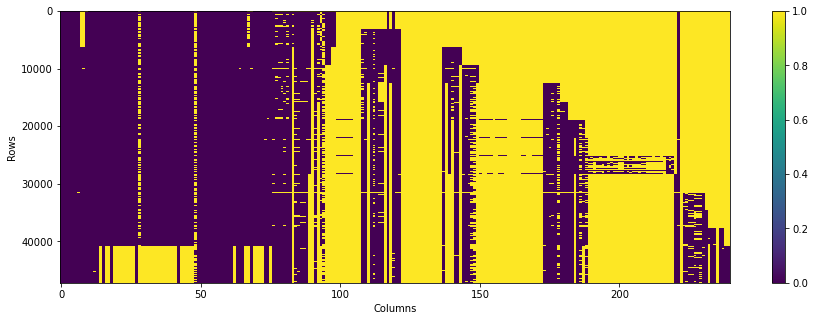

In [78]:
plt.figure(figsize=(15, 5))
plt.imshow(merged.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

## Setting Threshold at 50%

In [79]:
# Get columns with more than 20000 missing values
cols_to_drop = merged.columns[merged.isna().sum() > 20000]

# Drop those columns
merge_cleaned = merged.drop(cols_to_drop, axis=1)

In [80]:
merge_cleaned = merge_cleaned.sort_values(by=['year', 'geo_code'])
merge_cleaned = merge_cleaned.reset_index(drop=True)
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,poverty_x,children_in_poverty_x,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
0,2010.0,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,36.2,0.277020,0.360926,0.248048,0.114006,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635,0.515003,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.062076,0.293291,0.169221,0.290703,0.115690,0.131096,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.217477,0.501062,0.295363,0.179785,0.405,NaN,0.138000,0.068,0.037,0.030,0.002,47.513321,66.048439,16.51,9778.1,0.2586,5.48,4.14,0.0883,0.2814,0.300,28.8,370.0,52.224775,1914.800000,91.803383,0.8149,0.715190,256.487012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53255.0,0.161946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833
1,2010.0,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,41.0,0.233084,0.322036,0.279969,0.164912,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958,0.511340,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.065605,0.315219,0.175586,0.268785,0.134832,0.105578,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,

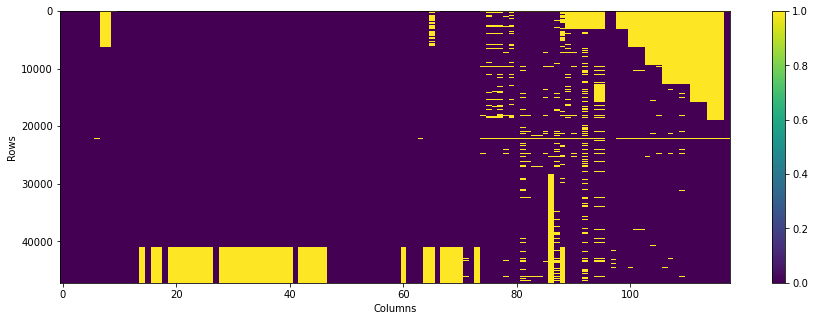

In [81]:
plt.figure(figsize=(15, 5))
plt.imshow(merge_cleaned.isna(), aspect='auto', interpolation='nearest', cmap='viridis')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar()
plt.show()

In [82]:
merge_cleaned.to_csv('merge_cleaned_091524.csv')
# !cp merge_cleaned.csv drive/MyDrive/

In [83]:
merge_cleaned = pd.read_csv('merge_cleaned_091524.csv', index_col=0, dtype={"geo_code": str, "year": 'Int64'})
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,poverty_x,children_in_poverty_x,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,36.2,0.277020,0.360926,0.248048,0.114006,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635,0.515003,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.062076,0.293291,0.169221,0.290703,0.115690,0.131096,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.217477,0.501062,0.295363,0.179785,0.405,NaN,0.138000,0.068,0.037,0.030,0.002,47.513321,66.048439,16.51,9778.1,0.2586,5.48,4.14,0.0883,0.2814,0.300,28.8,370.0,52.224775,1914.800000,91.803383,0.8149,0.715190,256.487012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53255.0,0.161946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,41.0,0.233084,0.322036,0.279969,0.164912,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958,0.511340,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.065605,0.315219,0.175586,0.268785,0.134832,0.105578,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.11

# Handling FIPS Code Changes

I actually handled this without code asking ChatGPT what FIPS code changes there were from 2010 to 2024.  Most changes were in Alaska, Connecticut, Georgia, and Virginia.

In [19]:
merge_cleaned.loc[(merge_cleaned.year == 2015) & (merge_cleaned.geo_code == "02270")].index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [23]:
year_list = [2015, 2016]

for year in year_list:
    merge_cleaned.loc[
        (merge_cleaned.year == year) & (merge_cleaned.geo_code == "02158")
    ] = merge_cleaned.loc[
        (merge_cleaned.year == year) & (merge_cleaned.geo_code == "02158")
    ].combine_first(
        merge_cleaned.loc[
            (merge_cleaned.year == year) & (merge_cleaned.geo_code == "02270")
        ]
    )

In [159]:
merge_cleaned = merge_cleaned.drop(
    index=merge_cleaned.loc[
        (merge_cleaned.year == 2015) & (merge_cleaned.geo_code == "02270")
    ].index
)

merge_cleaned = merge_cleaned.drop(
    index=merge_cleaned.loc[
        (merge_cleaned.year == 2016) & (merge_cleaned.geo_code == "02270")
    ].index
)

In [148]:
merge_cleaned.loc[(merge_cleaned.year==2015) & (merge_cleaned.geo_code=='02158')] = merge_cleaned.loc[(merge_cleaned.year==2015) & (merge_cleaned.geo_code=='02158')].combine_first(merge_cleaned.loc[(merge_cleaned.year==2015) & (merge_cleaned.geo_code=='02270')])

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,male_pop_0_17_x,male_pop_18_44_x,male_pop_45_64_x,male_pop_65+_x,female_pop_0_17_x,female_pop_18_44_x,female_pop_45_64_x,female_pop_65+_x,total_female_pop_x,total_male_pop_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_aapi,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,gini_index,poverty_rate,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,teen_births,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,children_in_poverty,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_asian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
15791,2015.0,02158,Alaska,AK,"Kusilvak Census Area, Alaska",Kusilvak Census Area,NaN,0.280724,0.092593,0.442196,0.797626,0.051929,4.042316,7914.0,23.0,0.402578,0.360374,0.184483,0.052565,1683.0,1527.0,797.0,193.0,1503.0,1325.0,663.0,223.0,3714.0,4200.0,0.469295,0.017417,0.059507,0.029028,0.002419,0.127238,0.085631,0.016449,0.029028,0.019836,0.34688,0.015481,0.220126,0.030963,28.576365,0.299468,0.227866,0.223512,0.146105,0.103048,0.010235,0.044604,0.003538,0.873768,0.004928,0.903743,0.768865,0.555556,0.314914,0.130822,0.130822,0.775014,0.050027,0.285289,0.449089,0.4082,33.3,0.046,0.029,0.004,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
merge_cleaned.loc[(merge_cleaned.geo_code=='01258') | (merge_cleaned.geo_code == "02270")]

,year,geo_code,state,state_code,geo_full_name,geo_name,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,male_pop_0_17_x,male_pop_18_44_x,male_pop_45_64_x,male_pop_65+_x,female_pop_0_17_x,female_pop_18_44_x,female_pop_45_64_x,female_pop_65+_x,total_female_pop_x,total_male_pop_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_aapi,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,poverty_x,children_in_poverty_x,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,diversity_index,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_asian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
94,2010.0,02270,Alaska,AK,"Wade Hampton Census Area, Alaska",Wade Hampton Census Area,NaN,NaN,NaN,0.694685,0.074987,4.021267,7398.0,21.5,0.421736,0.359827,0.168018,0.050419,1669.0,1400.0,669.0,170.0,1451.0,1262.0,574.0,203.0,3490.0,3908.0,0.471749,0.027344,0.054688,0.016113,0.000000,0.105957,0.100586,0.007324,0.014648,0.008301,0.394043,0.045410,0.188477,0.037109,26.542324,0.329590,0.225586,0.187500,0.131348,0.125977,0.004055,0.033252,0.001217,0.916734,0.004461,0.976273,0.647569,0.625000,0.315394,0.103400,0.103400,0.736486,0.077088,0.302211,0.384714,0.386574,0.4080,NaN,NaN,0.085,0.031,0.017,0.001,88.036117,97.102088,13.89,15.85,16087.50,0.3094,4.41,3.14,0.064800,0.3974,0.299,17.700000,2097.60000,0.0,-7580.0,215.731911,NaN,0.414894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.131042
3240,2011.0,02270,Alaska,AK,"Wade Hampton Census Area, Alaska",Wade Hampton Census Area,NaN,NaN,NaN,0.714281,0.032177,3.813640,7473.0,21.7,0.417235,0.360230,0.171016,0.051519,1644.0,1411.0,695.0,175.0,1474.0,1281.0,583.0,210.0,3548.0,3925.0,0.474776,0.020690,0.055172,0.014778,0.000000,0.108374,0.076847,0.009852,0.020690,0.012808,0.404926,0.026108,0.200985,0.048768,27.083333,0.349754,0.215271,0.181773,0.142365,0.110837,0.004416,0.033320,0.001204,0.906865,0.006022,0.988331,0.670362,0.644107,0.312135,0.

In [85]:
merge_cleaned = pd.read_csv('merge_cleaned_091524.csv', index_col=0, dtype={"geo_code": str, "year": 'Int64'})
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,poverty_x,children_in_poverty_x,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,36.2,0.277020,0.360926,0.248048,0.114006,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635,0.515003,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.062076,0.293291,0.169221,0.290703,0.115690,0.131096,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.217477,0.501062,0.295363,0.179785,0.405,NaN,0.138000,0.068,0.037,0.030,0.002,47.513321,66.048439,16.51,9778.1,0.2586,5.48,4.14,0.0883,0.2814,0.300,28.8,370.0,52.224775,1914.800000,91.803383,0.8149,0.715190,256.487012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53255.0,0.161946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,41.0,0.233084,0.322036,0.279969,0.164912,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958,0.511340,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.065605,0.315219,0.175586,0.268785,0.134832,0.105578,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.11

# Data Imputation

## Imputing Block Missing Recent Years (2023 to 2024)

In [86]:
merge_2023_24 = merge_cleaned.loc[(merge_cleaned.year==2023) | (merge_cleaned.year==2024)]
merge_2023_24.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,median_age,pct_under_18,pct_age_18_44,pct_age_45_64,pct_65_and_older_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_female_x,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,unemployment_rate,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,college_completion,some_college_x,children_in_single_parent_households_x,single_parent_households_x,gini_index,poverty_x,children_in_poverty_x,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,diabetes_monitoring,high_school_graduation,violent_crime,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy
40894,2023,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.002312,0.105594,0.038433,0.131588,0.416,0.864011,4.794400,59095.0,NaN,0.234064,NaN,NaN,0.160487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028169,NaN,NaN,NaN,NaN,NaN,0.033268,0.724545,0.207310,0.004586,0.012031,0.001185,0.144426,0.742451,0.016359,0.011218,0.127533,0.126358,0.895845,NaN,0.596126,0.267662,0.267662,NaN,NaN,0.161,NaN,NaN,NaN,NaN,22.976946,0.684511,NaN,8027.394727,0.169,3.432211,4.797351,0.097382,0.183,0.373,19.009600,563.8,0.000445,2245.800000,4372.0,NaN,0.870000,NaN,0.166563,0.38,0.106,242.5,0.264,0.000355,2814.047619,66444.0,0.412507,0.004586,0.420022,0.130210,0.000322,3110.263158,10.0,0.0,427.073326,6.6,0.555378,0.321429,68.573070,0.145,0.000474,2110.535714,12.645828,0.107,0.162,0.375,76.585650
40895,2023,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.007597,0.108749,0.037614,0.136088,0.376,0.814019,4.300710,239294.0,NaN,0.212183,NaN,NaN,0.214698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029630,NaN,NaN,NaN,NaN,NaN,0.048417,0.831488,0.083679,0.008003,0.011225,0.000685,0.122390,0.771212,0.006425,0.012912,0.109629,0.105611,0.910142,NaN,0.661050,0.186992,0.186992,NaN,NaN,0.164,NaN,NaN,NaN,NaN,23.734320,0.740877,NaN,8118.358206,0.149,3.276177

In [87]:
pd.DataFrame(merge_2023_24.isna().sum())

,0
year,0
geo_code,0
state,2
state_code,2
geo_full_name,2
geo_name,2
pct_not_proficient_in_english_x,0
uninsured_x,2
uninsured_children_x,2
uninsured_adults_x,2


In [90]:
# keep features with 6285 missing values

features = [
 'median_age',
 'pct_age_18_44',
 'pct_age_45_64',
 'pct_agriculture_hunting_and_mining',
 'pct_construction',
 'pct_manufacturing',
 'pct_wholesale_trade',
 'pct_retail_trade',
 'pct_transportation_and_utilities',
 'pct_information',
 'pct_finance_insurance_and_real_estate',
 'pct_professional_management_and_scientific_services',
 'pct_educational_and_health_services',
 'pct_arts_entertainment_and_accommodation_services',
 'pct_public_administration',
 'pct_other_services',
 'pct_mgmt_bus_sci_art_occupations',
 'pct_service_occupations',
 'pct_sales_and_office_occupations',
 'pct_nat_res_constr_maint_occupations',
 'pct_prod_transp_mat_moving_occupations',
 'college_completion',
 'gini_index',
 'poverty_x',
 'single_parent_households_x',
 'pct_moved_within_same_county',
 'pct_moved_from_diff_county_same_state',
 'pct_moved_from_diff_county_diff_state',
 'pct_moved_from_abroad',
 'diabetes_monitoring',
 'violent_crime',
 'pct_male_pop_0_17_x',
 'pct_male_pop_18_44_x',
 'pct_male_pop_45_64_x',
 'pct_male_pop_65+_x',
 'pct_female_pop_0_17_x',
 'pct_female_pop_18_44_x',
 'pct_female_pop_45_64_x',
 'pct_female_pop_65+_x']

In [91]:
len(features)

39

In [92]:

data = pd.concat([merge_cleaned[['geo_code', 'year']], merge_cleaned[features]], axis=1)
data_pivot = data.pivot_table(index="geo_code", columns="year", values=features)
data_pivot.head()

college_completion                                                    \
year                   2010      2011      2012      2013      2014      2015   
geo_code                                                                        
01001              0.217477  0.216246  0.217078  0.209323  0.219413  0.232303   
01003              0.268221  0.272149  0.277416  0.277458  0.286245  0.289852   
01005              0.135124  0.138977  0.145243  0.134032  0.136069  0.125160   
01007              0.100252  0.098097  0.089960  0.120665  0.102404  0.106469   
01009              0.125272  0.112988  0.123815  0.120913  0.122631  0.128908   

                                                                      \
year          2016      2017      2018      2019      2020      2021   
geo_code                                                               
01001     0.245928  0.249640  0.276893  0.265716  0.283175  0.281315   
01003     0.295471  0.307421  0.313459  0.318625  0.319073  0.324503   
01005     0.128678  0.120321  0.122159  0.115787  0.116143  0.111531   
01007     0.120000  0.132228  0.114892  0.103785  0.113467  0.119138   
01009     0.130498  0.131020  0.126429  0.130934  0.132516  0.149036   

                   diabetes_monitoring                                \
year          2022                2010      2011      2012      2013   
geo_code                                                               
01001     0.295586              0.8149  0.818533  0.842478  0.847716   
01003     0.325616              0.7916  0.803769  0.809461  0.808711   
01005     0.118812              0.7968  0.832487  0.847926  0.858316   
01007     0.109199              0.7453  0.801887  0.815331  0.854785   
01009     0.147414              0.7686  0.707602  0.822866  0.844660   

                                                           gini_index          \
year          2014      2015      2016      2017      2018       2010    2011   
geo_code                                                                        
01001     0.868217  0.846154  0.838440  0.839662  0.839662      0.405  0.4065   
01003     0.802135  0.810603  0.840047  0.832122  0.832122      0.439  0.4370   
01005     0.876380  0.857143  0.900383  0.891429  0.891429      0.464  0.4536   
01007     0.827476  0.828746  0.838323  0.819820  0.819820      0.411  0.4064   
01009     0.835088  0.861224  0.862069  0.876596  0.876596      0.422  0.4176   

                                                                          \
year        2012    2013    2014    2015    2016    2017    2018    2019   
geo_code                                                                   
01001     0.4122  0.4031  0.4100  0.4227  0.4295  0.4501  0.4602  0.4542   
01003     0.4364  0.4455  0.4517  0.4564  0.4608  0.4618  0.4609  0.4587   
01005     0.4758  0.4658  0.4608  0.4642  0.4620  0.4622  0.4731  0.4883   
01007     0.4212  0.4500  0.4365  0.4410  0.4494  0.4518  0.4294  0.4487   
01009     0.4112  0.4144  0.4134  0.4037  0.4165  0.4302  0.4331  0.4570   

                                 median_age                                \
year        2020    2021    2022       2010  2011  2012  2013  2014  2015   
geo_code                                                                    
01001     0.4552  0.4499  0.4541       36.2  36.4  37.0  37.5  37.9  37.7   
01003     0.4566  0.4572  0.4648       41.0  41.4  41.2  41.5  41.8  42.2   
01005     0.5047  0.5046  0.5098       38.0  38.3  38.2  38.3  38.3  38.8   
01007     0.4500  0.4532  0.4553       38.3  39.1  39.4  39.4  40.0  38.9   
01009     0.4685  0.4562  0.4475       38.3  38.8  39.1  39.6  40.2  40.7   

                                                   pct_age_18_44            \
year      2016  2017  2018  2019  2020  2021  2022          2010      2011   
geo_code                                                                     
01001     37.8  37.8  37.8  38.2  38.6  38.5  39.0      0.360926  0.358613   
01003     42.3  42.

### Using KNN to Impute Missing Values in Years 2010-2022

In [93]:
# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

Imputing row 1/3147 with 2 missing, elapsed time: 10.138
Imputing row 101/3147 with 2 missing, elapsed time: 10.165
Imputing row 201/3147 with 0 missing, elapsed time: 10.171
Imputing row 301/3147 with 4 missing, elapsed time: 10.176
Imputing row 401/3147 with 2 missing, elapsed time: 10.183
Imputing row 501/3147 with 4 missing, elapsed time: 10.191
Imputing row 601/3147 with 2 missing, elapsed time: 10.200
Imputing row 701/3147 with 14 missing, elapsed time: 10.203
Imputing row 801/3147 with 4 missing, elapsed time: 10.212
Imputing row 901/3147 with 14 missing, elapsed time: 10.221
Imputing row 1001/3147 with 4 missing, elapsed time: 10.229
Imputing row 1101/3147 with 4 missing, elapsed time: 10.237
Imputing row 1201/3147 with 2 missing, elapsed time: 10.243
Imputing row 1301/3147 with 2 missing, elapsed time: 10.246
Imputing row 1401/3147 with 4 missing, elapsed time: 10.253
Imputing row 1501/3147 with 2 missing, elapsed time: 10.267
Imputing row 1601/3147 with 0 missing, elapsed tim

In [94]:
df_knn_imputed.set_index(data_pivot.index, inplace=True)
df_knn_imputed = df_knn_imputed.stack().reset_index()
df_knn_imputed.head()

,geo_code,year,college_completion,diabetes_monitoring,gini_index,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_construction,pct_educational_and_health_services,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_finance_insurance_and_real_estate,pct_information,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_wholesale_trade,poverty_x,single_parent_households_x,violent_crime
0,01001,2010,0.217477,0.814900,0.4050,36.2,0.360926,0.248048,0.009449,0.086767,0.077400,0.174315,0.264694,0.361352,0.246320,0.127635,0.065322,0.011257,0.290109,0.360473,0.249884,0.099535,0.141284,0.293291,0.002,0.030,0.037,0.068,0.115690,0.045520,0.131096,0.069964,0.116676,0.126659,0.290703,0.169221,0.044246,0.031141,0.136833,0.179785,256.487012
1,01001,2011,0.216246,0.818533,0.4065,36.4,0.358613,0.252187,0.012469,0.081611,0.069804,0.183148,0.262441,0.357508,0.249730,0.130320,0.061602,0.009942,0.283487,0.359785,0.254795,0.101933,0.139650,0.311695,0.002,0.044,0.038,0.068,0.107171,0.044285,0.143751,0.070508,0.112722,0.124984,0.275612,0.161771,0.052985,0.036290,0.135272,0.170717,256.300000
2,01001,2012,0.217078,0.842478,0.4122,37.0,0.353838,0.255450,0.014342,0.078010,0.056456,0.187979,0.258449,0.351490,0.251925,0.138136,0.061637,0.011233,0.278356,0.356319,0.259176,0.106150,0.135876,0.321285,0.001,0.034,0.038,0.064,0.090238,0.044684,0.143668,0.074197,0.114031,0.134964,0.283938,0.160870,0.056870,0.029720,0.115510,0.177385,290.509373
3,01001,2013,0.209323,0.847716,0.4031,37.5,0.352487,0.258911,0.014037,0.075615,0.058027,0.177090,0.249306,0.351995,0.257274,0.141424,0.059615,0.011238,0.275557,0.353003,0.260628,0.110813,0.128838,0.317417,0.001,0.035,0.044,0.070,0.092743,0.059114,0.150437,0.078205,0.113924,0.135272,0.272215,0.167189,0.058863,0.030163,0.121334,0.162124,300.336683
4,01001,2014,0.219413,0.868217,0.4100,37.9,0.349499,0.259921,0.015740,0.076088,0.056124,0.178975,0.248078,0.347014,0.255906,0.149002,0.059686,0.013337,0.268096,0.352133,0.264174,0.115597,0.132295,0.323158,0.002,0.038,0.056,0.059,0.093775,0.061550,0.160833,0.081556,0.112993,0.127863,0.254152,0.168082,0.051816,0.031976,0.128052,0.152088,302.909674


In [96]:
df_knn_imputed.to_csv('df_knn_imputed_091524.csv')

In [97]:
df_knn_imputed = pd.read_csv('df_knn_imputed_091524.csv', index_col=0, dtype={"geo_code": str, "year": int})
df_knn_imputed.head()

,geo_code,year,college_completion,diabetes_monitoring,gini_index,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_construction,pct_educational_and_health_services,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_finance_insurance_and_real_estate,pct_information,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_wholesale_trade,poverty_x,single_parent_households_x,violent_crime
0,01001,2010,0.217477,0.814900,0.4050,36.2,0.360926,0.248048,0.009449,0.086767,0.077400,0.174315,0.264694,0.361352,0.246320,0.127635,0.065322,0.011257,0.290109,0.360473,0.249884,0.099535,0.141284,0.293291,0.002,0.030,0.037,0.068,0.115690,0.045520,0.131096,0.069964,0.116676,0.126659,0.290703,0.169221,0.044246,0.031141,0.136833,0.179785,256.487012
1,01001,2011,0.216246,0.818533,0.4065,36.4,0.358613,0.252187,0.012469,0.081611,0.069804,0.183148,0.262441,0.357508,0.249730,0.130320,0.061602,0.009942,0.283487,0.359785,0.254795,0.101933,0.139650,0.311695,0.002,0.044,0.038,0.068,0.107171,0.044285,0.143751,0.070508,0.112722,0.124984,0.275612,0.161771,0.052985,0.036290,0.135272,0.170717,256.300000
2,01001,2012,0.217078,0.842478,0.4122,37.0,0.353838,0.255450,0.014342,0.078010,0.056456,0.187979,0.258449,0.351490,0.251925,0.138136,0.061637,0.011233,0.278356,0.356319,0.259176,0.106150,0.135876,0.321285,0.001,0.034,0.038,0.064,0.090238,0.044684,0.143668,0.074197,0.114031,0.134964,0.283938,0.160870,0.056870,0.029720,0.115510,0.177385,290.509373
3,01001,2013,0.209323,0.847716,0.4031,37.5,0.352487,0.258911,0.014037,0.075615,0.058027,0.177090,0.249306,0.351995,0.257274,0.141424,0.059615,0.011238,0.275557,0.353003,0.260628,0.110813,0.128838,0.317417,0.001,0.035,0.044,0.070,0.092743,0.059114,0.150437,0.078205,0.113924,0.135272,0.272215,0.167189,0.058863,0.030163,0.121334,0.162124,300.336683
4,01001,2014,0.219413,0.868217,0.4100,37.9,0.349499,0.259921,0.015740,0.076088,0.056124,0.178975,0.248078,0.347014,0.255906,0.149002,0.059686,0.013337,0.268096,0.352133,0.264174,0.115597,0.132295,0.323158,0.002,0.038,0.056,0.059,0.093775,0.061550,0.160833,0.081556,0.112993,0.127863,0.254152,0.168082,0.051816,0.031976,0.128052,0.152088,302.909674


In [99]:
merge_cleaned = merge_cleaned.drop(columns=[
 'median_age',
 'pct_age_18_44',
 'pct_age_45_64',
 'pct_agriculture_hunting_and_mining',
 'pct_construction',
 'pct_manufacturing',
 'pct_wholesale_trade',
 'pct_retail_trade',
 'pct_transportation_and_utilities',
 'pct_information',
 'pct_finance_insurance_and_real_estate',
 'pct_professional_management_and_scientific_services',
 'pct_educational_and_health_services',
 'pct_arts_entertainment_and_accommodation_services',
 'pct_public_administration',
 'pct_other_services',
 'pct_mgmt_bus_sci_art_occupations',
 'pct_service_occupations',
 'pct_sales_and_office_occupations',
 'pct_nat_res_constr_maint_occupations',
 'pct_prod_transp_mat_moving_occupations',
 'college_completion',
 'gini_index',
 'poverty_x',
 'single_parent_households_x',
 'pct_moved_within_same_county',
 'pct_moved_from_diff_county_same_state',
 'pct_moved_from_diff_county_diff_state',
 'pct_moved_from_abroad',
 'diabetes_monitoring',
 'violent_crime',
 'pct_male_pop_0_17_x',
 'pct_male_pop_18_44_x',
 'pct_male_pop_45_64_x',
 'pct_male_pop_65+_x',
 'pct_female_pop_0_17_x',
 'pct_female_pop_18_44_x',
 'pct_female_pop_45_64_x',
 'pct_female_pop_65+_x'])

In [100]:
merge_cleaned = merge_cleaned.merge(df_knn_imputed, on=['geo_code', 'year'], how='left')
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,high_school_graduation,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy,college_completion,diabetes_monitoring,gini_index,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_construction,pct_educational_and_health_services,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_finance_insurance_and_real_estate,pct_information,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_wholesale_trade,poverty_x,single_parent_households_x,violent_crime
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,9778.1,0.2586,5.48,4.14,0.0883,0.2814,0.300,28.8,370.0,52.224775,1914.800000,91.803383,0.715190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53255.0,0.161946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833,0.217477,0.8149,0.405,36.2,0.360926,0.248048,0.009449,0.086767,0.077400,0.174315,0.264694,0.361352,0.246320,0.127635,0.065322,0.011257,0.290109,0.360473,0.249884,0.099535,0.141284,0.293291,0.002,0.030,0.037,0.068,0.115690,0.045520,0.131096,0.069964,0.116676,0.126659,0.290703,0.169221,0.044246,0.031141,0.136833,0.179785,256.487012
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,8221.7,0.1338,3.57,4.06,0.0877,0.2309,0.245,23.6,245.9,70.741370,1413.600000,65.391299,0.670437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50147.0,0.204360

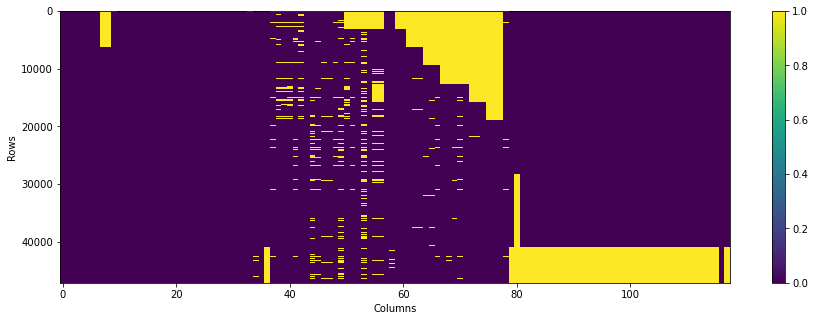

In [101]:
plt.figure(figsize=(15, 5))
plt.imshow(merge_cleaned.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

## Imputing Block not Missing Any Years Entirely

In [102]:
features_knn = ['premature_death',
'poor_or_fair_health',
 'poor_physical_health_days',
 'poor_mental_health_days',
 'low_birthweight',
 'adult_smoking',
 'adult_obesity',
 'motor_vehicle_crash_deaths',
 'sexually_transmitted_infections',
 'pcp',
 'ratio_of_pop_to_pcp',
 'preventable_hospital_stays',
 'high_school_graduation',
 'excessive_drinking',
 'mammography_screening',
 'diabetes_prevalence',
 'hiv_prevalence',
 'physical_inactivity',
 'mental_health_providers',
 'ratio_of_pop_to_mental_health',
 'median_household_income',
 'children_eligible_for_free_lunch']

In [103]:
merge_knn = merge_cleaned[features_knn]
merge_knn.head()

,premature_death,poor_or_fair_health,poor_physical_health_days,poor_mental_health_days,low_birthweight,adult_smoking,adult_obesity,motor_vehicle_crash_deaths,sexually_transmitted_infections,pcp,ratio_of_pop_to_pcp,preventable_hospital_stays,high_school_graduation,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,median_household_income,children_eligible_for_free_lunch
0,9778.1,0.2586,5.48,4.14,0.0883,0.2814,0.300,28.8,370.0,52.224775,1914.800000,91.803383,0.715190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53255.0,0.161946
1,8221.7,0.1338,3.57,4.06,0.0877,0.2309,0.245,23.6,245.9,70.741370,1413.600000,65.391299,0.670437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50147.0,0.204360
2,10686.1,0.2442,6.11,3.84,0.1100,0.2268,0.364,30.4,585.7,40.744262,2454.333333,92.297198,0.563422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33219.0,0.362199
3,13069.5,0.1817,4.22,5.31,0.0911,NaN,0.317,41.3,284.0,42.105263,2375.000000,96.794256,0.603834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41770.0,0.161418
4,8929.7,0.2493,5.62,4.47,0.0726,0.2342,0.315,28.6,85.1,19.987281,5003.181818,102.021063,0.730135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45549.0,0.201278


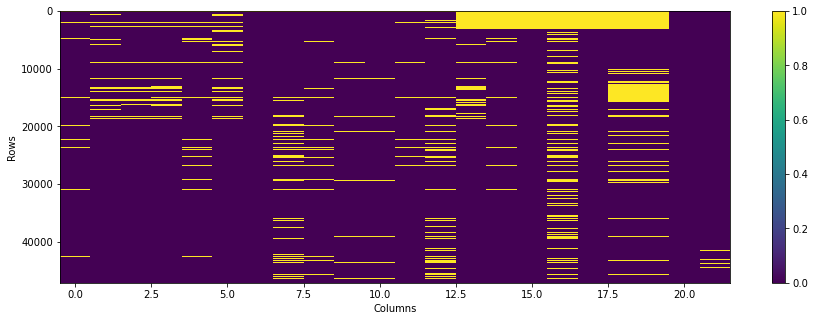

In [104]:
plt.figure(figsize=(15, 5))
plt.imshow(merge_knn.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

In [105]:
data = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[features_knn]], axis=1)
data_pivot = data.pivot_table(index="geo_code", columns="year", values=features_knn)
data_pivot.head()

adult_obesity                                                   \
year              2010   2011   2012   2013   2014   2015   2016   2017   
geo_code                                                                  
01001            0.300  0.315  0.341  0.341  0.305  0.313  0.309  0.341   
01003            0.245  0.262  0.255  0.255  0.266  0.250  0.267  0.274   
01005            0.364  0.376  0.370  0.370  0.373  0.384  0.408  0.444   
01007            0.317  0.323  0.340  0.340  0.343  0.373  0.401  0.403   
01009            0.315  0.319  0.320  0.320  0.304  0.309  0.324  0.346   

                                                          adult_smoking  \
year       2018   2019   2020   2021   2022   2023   2024          2010   
geo_code                                                                  
01001     0.364  0.375  0.333  0.330  0.353  0.373  0.389        0.2814   
01003     0.293  0.310  0.310  0.300  0.296  0.326  0.372        0.2309   
01005     0.442  0.443  0.417  0.412  0.404  0.464  0.434        0.2268   
01007     0.384  0.378  0.376  0.374  0.412  0.384  0.396           NaN   
01009     0.358  0.344  0.338  0.330  0.387  0.327  0.377        0.2342   

                                                                        \
year       2011   2012   2013   2014   2015   2016      2017      2018   
geo_code                                                                 
01001     0.274  0.246  0.235  0.217  0.217  0.187  0.173802  0.191247   
01003     0.219  0.227  0.226  0.206  0.206  0.186  0.179371  0.167955   
01005     0.229  0.234  0.235  0.251  0.251  0.214  0.227767  0.215409   
01007     0.330  0.351  0.328  0.259  0.259  0.210  0.198508  0.199164   
01009     0.223  0.227  0.220  0.213  0.213  0.194  0.210374  0.196522   

                                                             \
year          2019      2020      2021   2022   2023   2024   
geo_code                                                      
01001     0.191247  0.180816  0.198108  0.197  0.183  0.169   
01003     0.167955  0.174890  0.185133  0.199  0.169  0.150   
01005     0.215409  0.220000  0.255308  0.278  0.259  0.250   
01007     0.199164  0.191142  0.230848  0.252  0.228  0.220   
01009     0.196522  0.192087  0.229550  0.222  0.218  0.196   

         children_eligible_for_free_lunch                                    \
year                                 2010   2011   2012      2013      2014   
geo_code                                                                      
01001                            0.161946  0.288  0.288  0.361167  0.361167   
01003                            0.204360  0.289  0.289  0.367619  0.367619   
01005                            0.362199  0.651  0.651  0.663890  0.663890   
01007                            0.161418  0.478  0.478  0.535023  0.535023   
01009                            0.201278  0.368  0.368  0.439314  0.439314   

                                                                      \
year          2015      2016      2017      2018      2019      2020   
geo_code                                                               
01001     0.383410  0.369456  0.489027  0.484754  0.479317  0.434087   
01003     0.344077  0.361603  0.418388  0.457955  0.450791  0.484866   
01005     0.696779  0.432472  0.673681  0.663026  0.737698  0.632923   
01007     0.546482  0.549640  0.634495  0.613185  0.653297  0.615621   
01009     0.442298  0.450031  0.530783  0.545202  0.533118  0.529063   

                                                 diabetes_prevalence         \
year          2021      2022      2023      2024                2011   2012   
geo_code                                                                      
01001     0.474929  0.454825  0.412507  0.279986               0.114  0.123   
01003     0.400130  0.461323  0.463740  0.369956               0.098  0.114   
01005     0.607700  0.602062  0.586929  0.565651               0.136  0.140   
01007     0.631026  0.591

### Using KNN

In [106]:
# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

Imputing row 1/3147 with 0 missing, elapsed time: 8.624
Imputing row 101/3147 with 1 missing, elapsed time: 8.671
Imputing row 201/3147 with 0 missing, elapsed time: 8.683
Imputing row 301/3147 with 1 missing, elapsed time: 8.706
Imputing row 401/3147 with 1 missing, elapsed time: 8.716
Imputing row 501/3147 with 9 missing, elapsed time: 8.735
Imputing row 601/3147 with 16 missing, elapsed time: 8.768
Imputing row 701/3147 with 4 missing, elapsed time: 8.808
Imputing row 801/3147 with 3 missing, elapsed time: 8.817
Imputing row 901/3147 with 81 missing, elapsed time: 8.843
Imputing row 1001/3147 with 2 missing, elapsed time: 8.928
Imputing row 1101/3147 with 2 missing, elapsed time: 8.947
Imputing row 1201/3147 with 2 missing, elapsed time: 8.955
Imputing row 1301/3147 with 9 missing, elapsed time: 8.968
Imputing row 1401/3147 with 70 missing, elapsed time: 8.996
Imputing row 1501/3147 with 0 missing, elapsed time: 9.007
Imputing row 1601/3147 with 0 missing, elapsed time: 9.035
Imputi

In [107]:
df_knn_imputed.set_index(data_pivot.index, inplace=True)
df_knn_imputed = df_knn_imputed.stack().reset_index()
df_knn_imputed.head()

,geo_code,year,adult_obesity,adult_smoking,children_eligible_for_free_lunch,diabetes_prevalence,excessive_drinking,high_school_graduation,hiv_prevalence,low_birthweight,mammography_screening,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,pcp,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp,sexually_transmitted_infections
0,01001,2010,0.300,0.2814,0.161946,NaN,NaN,0.71519,NaN,0.0883,NaN,53255.0,NaN,28.800000,52.224775,NaN,4.14,0.2586,5.48,9778.10,91.803383,NaN,1914.800000,370.0
1,01001,2011,0.315,0.2740,0.288000,0.114,0.141,0.74000,169.90,0.0945,0.695122,51622.0,0.000020,28.300000,0.000437,0.327,4.10,0.2580,5.20,9967.40,78.853600,50354.0,2288.818182,307.8
2,01001,2012,0.341,0.2460,0.288000,0.123,0.159,0.84500,185.32,0.0970,0.638177,53049.0,0.000020,28.383137,0.000437,0.322,4.10,0.2220,4.90,9865.83,90.710834,50354.0,2288.818182,424.9
3,01001,2013,0.341,0.2350,0.361167,0.123,0.165,0.80000,185.00,0.0940,0.684659,48863.0,0.000037,23.917000,0.000366,0.322,4.30,0.2320,5.10,8376.42,70.950000,27318.5,2731.850000,362.8
4,01001,2014,0.305,0.2170,0.361167,0.118,0.167,0.80000,181.10,0.0930,0.665882,51441.0,NaN,23.917000,0.000380,0.294,3.60,0.2280,5.10,8376.42,75.145591,NaN,2631.761905,446.9


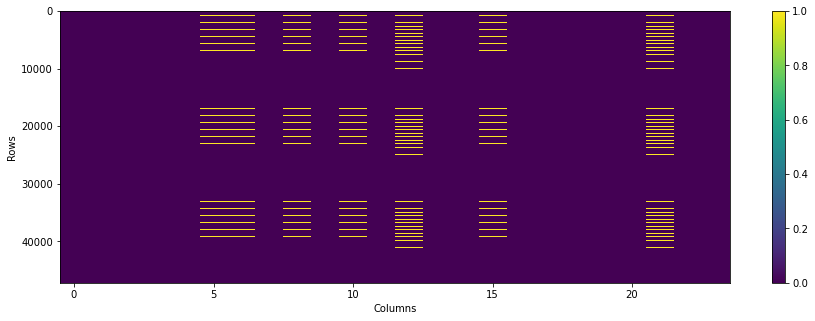

In [108]:
plt.figure(figsize=(15, 5))
plt.imshow(df_knn_imputed.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

In [109]:
merge_cleaned = merge_cleaned.drop(columns=features_knn)
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy,college_completion,diabetes_monitoring,gini_index,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_construction,pct_educational_and_health_services,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_finance_insurance_and_real_estate,pct_information,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_wholesale_trade,poverty_x,single_parent_households_x,violent_crime
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833,0.217477,0.8149,0.405,36.2,0.360926,0.248048,0.009449,0.086767,0.077400,0.174315,0.264694,0.361352,0.246320,0.127635,0.065322,0.011257,0.290109,0.360473,0.249884,0.099535,0.141284,0.293291,0.002,0.030,0.037,0.068,0.115690,0.045520,0.131096,0.069964,0.116676,0.126659,0.290703,0.169221,0.044246,0.031141,0.136833,0.179785,256.487012
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.707111,0.268221,0.7916,0.439,41.0,0.322036,0.279969,0.018619,0.095237,0.107106,0.179215,0.224343,0.316290,0.286409,0.172958,0.068492,0.017320,0.242230,0.328048,0.273230,0.156492,0.092078,0.315219,0.004,0.054,0.027,0.086,0.134832,0.049300,0.105578,0.098688,0.045950,0.137723,0.268785,0.175586,0.053540,0.036729,0.130669,0.138206,171.623233
2,2010,01005,Alabama,AL,"Barbour County, Alabama",Barbour,0.021339,NaN,NaN,0.151,26.762889,0.789877,5.835112,27699.0,0.224918,0.137406,0.471028,0.095894,0.045958,0.472111,0.464674,0.003141,0.001661,0.000108,0.158040,0.680449,0.013783,0.003675,0.171885,0.171885,0.718629,0.364850,0.519583,0.341000,87.486157,74.681632,20.08,NaN,NaN,Na

In [110]:
merge_cleaned = merge_cleaned.merge(df_knn_imputed, on=['geo_code', 'year'])
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy,college_completion,diabetes_monitoring,gini_index,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_construction,pct_educational_and_health_services,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_finance_insurance_and_real_estate,pct_information,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_wholesale_trade,poverty_x,single_parent_households_x,violent_crime,adult_obesity,adult_smoking,children_eligible_for_free_lunch,diabetes_prevalence,excessive_drinking,high_school_graduation,hiv_prevalence,low_birthweight,mammography_screening,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,pcp,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp,sexually_transmitted_infections
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833,0.217477,0.8149,0.405,36.2,0.360926,0.248048,0.009449,0.086767,0.077400,0.174315,0.264694,0.361352,0.246320,0.127635,0.065322,0.011257,0.290109,0.360473,0.249884,0.099535,0.141284,0.293291,0.002,0.030,0.037,0.068,0.115690,0.045520,0.131096,0.069964,0.116676,0.126659,0.290703,0.169221,0.044246,0.031141,0.136833,0.179785,256.487012,0.300,0.281400,0.161946,NaN,NaN,0.715190,NaN,0.0883,NaN,53255.0,NaN,28.8,52.224775,NaN,4.14,0.2586,5.48,9778.1,91.803383,NaN,1914.800000,370.0
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.707111,0.268221,0.7916,0.439,41.0,0.322036,0.279969,0.01861

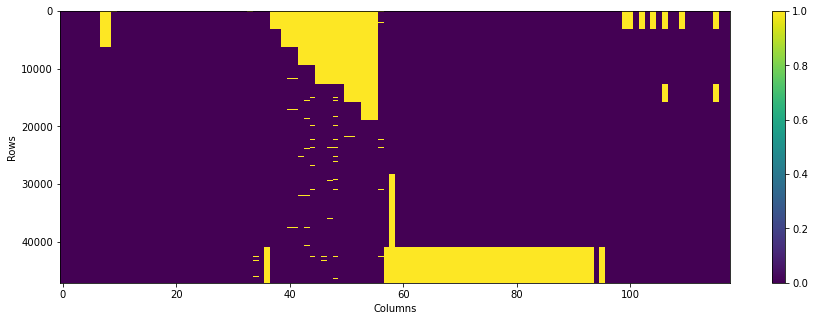

In [111]:
plt.figure(figsize=(15, 5))
plt.imshow(merge_cleaned.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

## Predicting Missing Values for Years 2023 and 2024

In [112]:
features_sarimax = [
    "median_age",
    "pct_age_18_44",
    "pct_age_45_64",
    "pct_agriculture_hunting_and_mining",
    "pct_construction",
    "pct_manufacturing",
    "pct_wholesale_trade",
    "pct_retail_trade",
    "pct_transportation_and_utilities",
    "pct_information",
    "pct_finance_insurance_and_real_estate",
    "pct_professional_management_and_scientific_services",
    "pct_educational_and_health_services",
    "pct_arts_entertainment_and_accommodation_services",
    "pct_public_administration",
    "pct_other_services",
    "pct_mgmt_bus_sci_art_occupations",
    "pct_service_occupations",
    "pct_sales_and_office_occupations",
    "pct_nat_res_constr_maint_occupations",
    "pct_prod_transp_mat_moving_occupations",
    "college_completion",
    "gini_index",
    "poverty_x",
    "violent_crime",
    "pct_moved_within_same_county",
    "pct_moved_from_diff_county_same_state",
    "pct_moved_from_diff_county_diff_state",
    "pct_moved_from_abroad",
    "pct_male_pop_0_17_x",
    "pct_male_pop_18_44_x",
    "pct_male_pop_45_64_x",
    "pct_male_pop_65+_x",
    "pct_female_pop_0_17_x",
    "pct_female_pop_18_44_x",
    "pct_female_pop_45_64_x",
    "pct_female_pop_65+_x",
]

In [113]:
data = pd.concat([merge_cleaned[['geo_code', 'year']], merge_cleaned[features_sarimax]], axis=1)
data.head()

,geo_code,year,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,college_completion,gini_index,poverty_x,violent_crime,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x
0,01001,2010,36.2,0.360926,0.248048,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.293291,0.169221,0.290703,0.115690,0.131096,0.217477,0.405,0.136833,256.487012,0.068,0.037,0.030,0.002,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635
1,01003,2010,41.0,0.322036,0.279969,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.315219,0.175586,0.268785,0.134832,0.105578,0.268221,0.439,0.130669,171.623233,0.086,0.027,0.054,0.004,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958
2,01005,2010,38.0,0.367450,0.270226,0.040973,0.063478,0.282571,0.012716,0.124836,0.079221,0.008174,0.037945,0.039156,0.150066,0.058432,0.062872,0.039560,0.265819,0.156524,0.213442,0.103441,0.260773,0.135124,0.464,0.117640,64.005310,0.074,0.070,0.026,0.000,0.217445,0.411821,0.261057,0.109678,0.233310,0.317621,0.280524,0.168544
3,01007,2010,38.3,0.379832,0.261477,0.038191,0.106426,0.180059,0.022711,0.137081,0.104288,0.008046,0.057236,0.046746,0.137387,0.039312,0.039923,0.082595,0.200835,0.132193,0.228740,0.185660,0.252572,0.100252,0.411,0.128374,127.580788,0.053,0.030,0.010,0.002,0.242805,0.400756,0.259086,0.097352,0.224445,0.355475,0.264261,0.155819
4,01009,2010,38.3,0.345216,0.264923,0.031733,0.109973,0.167813,0.038371,0.115680,0.069619,0.014248,0.046264,0.066947,0.175180,0.064802,0.040759,0.058609,0.246580,0.160285,0.256294,0.157573,0.179268,0.125272,0.422,0.058503,93.782854,0.071,0.037,0.013,0.006,0.260613,0.355021,0.259615,0.124751,0.235216,0.335593,0.270131,0.159059


In [115]:
data_2010_2022 = data.loc[data.year < 2023]
data_2010_2022.head()

,geo_code,year,median_age,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,college_completion,gini_index,poverty_x,violent_crime,pct_moved_within_same_county,pct_moved_from_diff_county_same_state,pct_moved_from_diff_county_diff_state,pct_moved_from_abroad,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x
0,01001,2010,36.2,0.360926,0.248048,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.293291,0.169221,0.290703,0.115690,0.131096,0.217477,0.405,0.136833,256.487012,0.068,0.037,0.030,0.002,0.290109,0.360473,0.249884,0.099535,0.264694,0.361352,0.246320,0.127635
1,01003,2010,41.0,0.322036,0.279969,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.315219,0.175586,0.268785,0.134832,0.105578,0.268221,0.439,0.130669,171.623233,0.086,0.027,0.054,0.004,0.242230,0.328048,0.273230,0.156492,0.224343,0.316290,0.286409,0.172958
2,01005,2010,38.0,0.367450,0.270226,0.040973,0.063478,0.282571,0.012716,0.124836,0.079221,0.008174,0.037945,0.039156,0.150066,0.058432,0.062872,0.039560,0.265819,0.156524,0.213442,0.103441,0.260773,0.135124,0.464,0.117640,64.005310,0.074,0.070,0.026,0.000,0.217445,0.411821,0.261057,0.109678,0.233310,0.317621,0.280524,0.168544
3,01007,2010,38.3,0.379832,0.261477,0.038191,0.106426,0.180059,0.022711,0.137081,0.104288,0.008046,0.057236,0.046746,0.137387,0.039312,0.039923,0.082595,0.200835,0.132193,0.228740,0.185660,0.252572,0.100252,0.411,0.128374,127.580788,0.053,0.030,0.010,0.002,0.242805,0.400756,0.259086,0.097352,0.224445,0.355475,0.264261,0.155819
4,01009,2010,38.3,0.345216,0.264923,0.031733,0.109973,0.167813,0.038371,0.115680,0.069619,0.014248,0.046264,0.066947,0.175180,0.064802,0.040759,0.058609,0.246580,0.160285,0.256294,0.157573,0.179268,0.125272,0.422,0.058503,93.782854,0.071,0.037,0.013,0.006,0.260613,0.355021,0.259615,0.124751,0.235216,0.335593,0.270131,0.159059


In [116]:
data_2010_2022.isna().sum()

geo_code                                               0
year                                                   0
median_age                                             0
pct_age_18_44                                          0
pct_age_45_64                                          0
pct_agriculture_hunting_and_mining                     0
pct_construction                                       0
pct_manufacturing                                      0
pct_wholesale_trade                                    0
pct_retail_trade                                       0
pct_transportation_and_utilities                       0
pct_information                                        0
pct_finance_insurance_and_real_estate                  0
pct_professional_management_and_scientific_services    0
pct_educational_and_health_services                    0
pct_arts_entertainment_and_accommodation_services      0
pct_public_administration                              0
pct_other_services             

In [120]:
columns_sarimax_subset = [
    "college_completion",
    "gini_index",
    "median_age",
    "poverty_x",
    "violent_crime",
    "pct_mgmt_bus_sci_art_occupations",
    "pct_service_occupations",
    "pct_sales_and_office_occupations",
    "pct_nat_res_constr_maint_occupations",
    "pct_prod_transp_mat_moving_occupations",
    "pct_agriculture_hunting_and_mining",
    "pct_construction",
    "pct_manufacturing",
    "pct_wholesale_trade",
    "pct_retail_trade",
    "pct_transportation_and_utilities",
    "pct_information",
    "pct_finance_insurance_and_real_estate",
    "pct_professional_management_and_scientific_services",
    "pct_educational_and_health_services",
    "pct_arts_entertainment_and_accommodation_services",
    "pct_public_administration",
    "pct_other_services",
    "pct_moved_within_same_county"
]

data = pd.concat([data_2010_2022[['geo_code', 'year']], data_2010_2022[columns_sarimax_subset]], axis=1)
data.head()

,geo_code,year,college_completion,gini_index,median_age,poverty_x,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county
0,01001,2010,0.217477,0.405,36.2,0.136833,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068
1,01003,2010,0.268221,0.439,41.0,0.130669,171.623233,0.315219,0.175586,0.268785,0.134832,0.105578,0.018619,0.107106,0.092078,0.036729,0.137723,0.053540,0.017320,0.068492,0.098688,0.179215,0.095237,0.045950,0.049300,0.086
2,01005,2010,0.135124,0.464,38.0,0.117640,64.005310,0.265819,0.156524,0.213442,0.103441,0.260773,0.040973,0.063478,0.282571,0.012716,0.124836,0.079221,0.008174,0.037945,0.039156,0.150066,0.058432,0.062872,0.039560,0.074
3,01007,2010,0.100252,0.411,38.3,0.128374,127.580788,0.200835,0.132193,0.228740,0.185660,0.252572,0.038191,0.106426,0.180059,0.022711,0.137081,0.104288,0.008046,0.057236,0.046746,0.137387,0.039312,0.039923,0.082595,0.053
4,01009,2010,0.125272,0.422,38.3,0.058503,93.782854,0.246580,0.160285,0.256294,0.157573,0.179268,0.031733,0.109973,0.167813,0.038371,0.115680,0.069619,0.014248,0.046264,0.066947,0.175180,0.064802,0.040759,0.058609,0.071


### Using SARIMAX (which requires no missing values from 2010-2022)

In [36]:
# Create a function to forecast missing years using SARIMA
def forecast_missing_years(county_data, feature_column):
    # Extract years and feature data
    years = county_data["year"]
    feature_data = county_data[feature_column].values

    # Fit SARIMA model to historical data (2010-2022)
    model = SARIMAX(
        feature_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)
    )  # Adjust order as needed
    model_fit = model.fit(disp=False)

    # Forecast for 2023 and 2024 (2 future steps)
    forecast = model_fit.forecast(steps=2)

    return forecast


# Group the data by geo_code and perform forecasting for each feature of each geo_code
imputed_values = []

for geo_code, group in data.groupby("geo_code"):
    geo_code_forecasts = {"year": [2023, 2024], "geo_code": geo_code}

    # Forecast each feature separately
    for feature in group.columns[2:]:  # Skipping 'year' and 'geo_code'
        forecast = forecast_missing_years(group, feature)
        geo_code_forecasts[feature] = forecast

    # Create a DataFrame with the imputed values for 2023 and 2024
    new_rows = pd.DataFrame(geo_code_forecasts)
    imputed_values.append(new_rows)

# Concatenate the original data with the imputed values
imputed = pd.concat([data] + imputed_values, ignore_index=True)

# Output the final dataframe with imputed values for 2023 and 2024
imputed = imputed.sort_values(by=["geo_code", "year"])

/Users/datascisteven/miniconda3/envs/ml-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/datascisteven/miniconda3/envs/ml-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/datascisteven/miniconda3/envs/ml-env/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


In [62]:
imputed.to_csv('imputed_sarimax_091424.csv')

In [118]:
imputed = pd.read_csv('imputed_sarimax_091424.csv', index_col=0, dtype={"geo_code": str, "year": int})
imputed.head()

,geo_code,year,college_completion,gini_index,median_age,poverty_x,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county
0,01001,2010,0.217477,0.4050,36.2,0.214724,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068
1,01001,2011,0.216246,0.4065,36.4,0.183035,256.300000,0.311695,0.161771,0.275612,0.107171,0.143751,0.012469,0.069804,0.139650,0.036290,0.124984,0.052985,0.009942,0.061602,0.070508,0.183148,0.081611,0.112722,0.044285,0.068
2,01001,2012,0.217078,0.4122,37.0,0.115510,290.509373,0.321285,0.160870,0.283938,0.090238,0.143668,0.014342,0.056456,0.135876,0.029720,0.134964,0.056870,0.011233,0.061637,0.074197,0.187979,0.078010,0.114031,0.044684,0.064
3,01001,2013,0.209323,0.4031,37.5,0.121334,300.336683,0.317417,0.167189,0.272215,0.092743,0.150437,0.014037,0.058027,0.128838,0.030163,0.135272,0.058863,0.011238,0.059615,0.078205,0.177090,0.075615,0.113924,0.059114,0.070
4,01001,2014,0.219413,0.4100,37.9,0.128052,302.909674,0.323158,0.168082,0.254152,0.093775,0.160833,0.015740,0.056124,0.132295,0.031976,0.127863,0.051816,0.013337,0.059686,0.081556,0.178975,0.076088,0.112993,0.061550,0.059


In [121]:
merge_cleaned = merge_cleaned.drop(columns=columns_sarimax_subset)
merge_cleaned = merge_cleaned.merge(imputed, on=['geo_code', 'year'], how='left')
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_x,uninsured_children_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,pct_aian,pct_rural,limited_access_to_healthy_foods,dentists,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,food_environment_index,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,injury_deaths,food_insecurity,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_physical_distress,frequent_mental_distress,insufficient_sleep,life_expectancy,diabetes_monitoring,pct_age_18_44,pct_age_45_64,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,single_parent_households_x,adult_obesity,adult_smoking,children_eligible_for_free_lunch,diabetes_prevalence,excessive_drinking,high_school_graduation,hiv_prevalence,low_birthweight,mammography_screening,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,pcp,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp,sexually_transmitted_infections,college_completion,gini_index,median_age,poverty_x,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,NaN,NaN,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.607833,0.8149,0.360926,0.248048,0.264694,0.361352,0.246320,0.127635,0.290109,0.360473,0.249884,0.099535,0.002,0.030,0.037,0.179785,0.300,0.281400,0.161946,NaN,NaN,0.715190,NaN,0.0883,NaN,53255.0,NaN,28.8,52.224775,NaN,4.14,0.2586,5.48,9778.1,91.803383,NaN,1914.800000,370.0,0.217477,0.405,36.2,0.214724,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,NaN,NaN,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.707111,0.7916,0.322036,0.279969,0.224343,0.316290,0.286409,

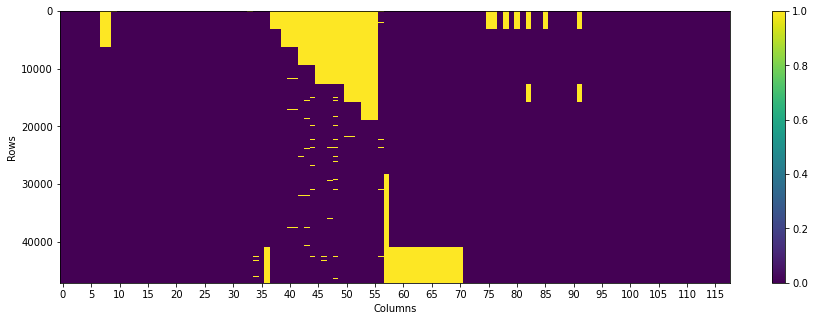

In [124]:
plt.figure(figsize=(15, 5))
plt.imshow(
    merge_cleaned.isna(), aspect="auto", interpolation="nearest", cmap="viridis"
)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(np.arange(0, 120, 5))
plt.colorbar()
plt.show()

## Imputing Block Missing Historical Data (2010-2014)

In [139]:
features_historical = [
    "excessive_drinking",
    "mammography_screening",
    "diabetes_prevalence",
    "hiv_prevalence",
    "physical_inactivity",
    "mental_health_providers",
    "ratio_of_pop_to_mental_health",
    "pct_rural",

    "uninsured_x",
    "uninsured_children_x",
    "limited_access_to_healthy_foods",
    "dentists",
    "ratio_of_pop_to_dentists",

    
    "air_pollution_particulate_matter",
    "drinking_water_violations",
    "premature_age_adjusted_mortality",

    "food_environment_index",
    "access_to_exercise_opportunities",
    "alcohol_impaired_driving_deaths",
    "injury_deaths",
    "food_insecurity",
    
    "other_pcp",
    "ratio_of_pop_to_pcp_other_than_physicians",
    "social_associations",
    
    "frequent_physical_distress",
    "frequent_mental_distress",
    "insufficient_sleep",
]

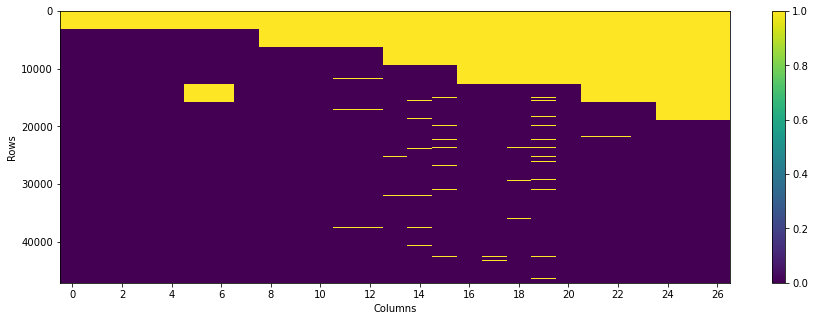

In [140]:
plt.figure(figsize=(15, 5))
plt.imshow(
    merge_cleaned[features_historical].isna(),
    aspect="auto",
    interpolation="nearest",
    cmap="viridis",
)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks(np.arange(0, 28, 2))
plt.colorbar()
plt.show()

### Sub-block missing only 2010

In [141]:
# missing 2010 only
group_1 = [
    "excessive_drinking",
    "mammography_screening",
    "diabetes_prevalence",
    "hiv_prevalence",
    "physical_inactivity",
    "mental_health_providers",
    "ratio_of_pop_to_mental_health",
    "pct_rural",
]

In [142]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_1]], axis=1)
df.head()

,geo_code,year,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,pct_rural
0,01001,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01003,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01005,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01007,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01009,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
df_2010 = df.loc[df.year > 2010]
df_2010.head()

,geo_code,year,excessive_drinking,mammography_screening,diabetes_prevalence,hiv_prevalence,physical_inactivity,mental_health_providers,ratio_of_pop_to_mental_health,pct_rural
3143,01001,2011,0.141,0.695122,0.114,169.9,0.327,0.000020,50354.0,0.448
3144,01003,2011,0.194,0.724967,0.098,176.1,0.252,0.000165,6076.0,0.542
3145,01005,2011,0.085,0.683168,0.136,331.2,0.349,0.000067,14918.0,0.715
3146,01007,2011,0.113,0.672414,0.111,89.5,0.366,0.000000,-21589.0,0.815
3147,01009,2011,0.049,0.567164,0.114,66.2,0.346,0.000017,57794.0,0.910


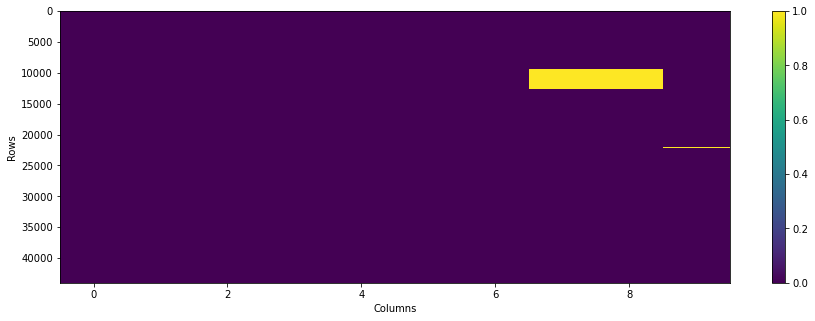

In [144]:
plt.figure(figsize=(15, 5))
plt.imshow(df_2010.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

In [145]:
data_pivot = df_2010.pivot_table(index="geo_code", columns="year", values=group_1)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_1 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_1.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_1 = df_knn_imputed_group_1.stack().reset_index()
df_knn_imputed_group_1.head()

Imputing row 1/3147 with 0 missing, elapsed time: 2.441
Imputing row 101/3147 with 0 missing, elapsed time: 2.444
Imputing row 201/3147 with 0 missing, elapsed time: 2.444
Imputing row 301/3147 with 0 missing, elapsed time: 2.445
Imputing row 401/3147 with 0 missing, elapsed time: 2.445
Imputing row 501/3147 with 0 missing, elapsed time: 2.445
Imputing row 601/3147 with 0 missing, elapsed time: 2.445
Imputing row 701/3147 with 0 missing, elapsed time: 2.445
Imputing row 801/3147 with 0 missing, elapsed time: 2.445
Imputing row 901/3147 with 0 missing, elapsed time: 2.445
Imputing row 1001/3147 with 0 missing, elapsed time: 2.445
Imputing row 1101/3147 with 0 missing, elapsed time: 2.446
Imputing row 1201/3147 with 0 missing, elapsed time: 2.446
Imputing row 1301/3147 with 0 missing, elapsed time: 2.446
Imputing row 1401/3147 with 0 missing, elapsed time: 2.446
Imputing row 1501/3147 with 0 missing, elapsed time: 2.446
Imputing row 1601/3147 with 0 missing, elapsed time: 2.446
Imputing 

,geo_code,year,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health
0,01001,2011,0.114,0.141,169.90,0.695122,0.000020,0.448000,0.327,50354.000000
1,01001,2012,0.123,0.159,185.32,0.638177,0.000020,0.448000,0.322,50354.000000
2,01001,2013,0.123,0.165,185.00,0.684659,0.000037,0.420022,0.322,27318.500000
3,01001,2014,0.118,0.167,181.10,0.665882,NaN,0.420022,0.294,NaN
4,01001,2015,0.121,0.167,181.10,0.687980,0.000127,0.420022,0.279,7892.285714


In [158]:
df_knn_imputed_group_1.isna().sum()

geo_code                            0
year                                0
diabetes_prevalence                 0
excessive_drinking                  0
hiv_prevalence                      0
mammography_screening               0
mental_health_providers          3147
pct_rural                           0
physical_inactivity                 0
ratio_of_pop_to_mental_health    3147
dtype: int64

### Sub-block missing 2010 and 2011

In [146]:
group_2 = [
    "uninsured_x",
    "uninsured_children_x",
    "limited_access_to_healthy_foods",
    "dentists",
    "ratio_of_pop_to_dentists",
]

In [147]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_2]], axis=1)
df_2011 = df.loc[df.year > 2011]

data_pivot = df_2011.pivot_table(index="geo_code", columns="year", values=group_2)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_2 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_2.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_2 = df_knn_imputed_group_2.stack().reset_index()
df_knn_imputed_group_2.head()

Imputing row 1/3147 with 0 missing, elapsed time: 1.850
Imputing row 101/3147 with 0 missing, elapsed time: 1.853
Imputing row 201/3147 with 0 missing, elapsed time: 1.855
Imputing row 301/3147 with 0 missing, elapsed time: 1.856
Imputing row 401/3147 with 0 missing, elapsed time: 1.856
Imputing row 501/3147 with 0 missing, elapsed time: 1.858
Imputing row 601/3147 with 0 missing, elapsed time: 1.860
Imputing row 701/3147 with 0 missing, elapsed time: 1.861
Imputing row 801/3147 with 0 missing, elapsed time: 1.861
Imputing row 901/3147 with 0 missing, elapsed time: 1.862
Imputing row 1001/3147 with 0 missing, elapsed time: 1.863
Imputing row 1101/3147 with 0 missing, elapsed time: 1.863
Imputing row 1201/3147 with 0 missing, elapsed time: 1.864
Imputing row 1301/3147 with 0 missing, elapsed time: 1.864
Imputing row 1401/3147 with 0 missing, elapsed time: 1.865
Imputing row 1501/3147 with 0 missing, elapsed time: 1.866
Imputing row 1601/3147 with 0 missing, elapsed time: 1.866
Imputing 

,geo_code,year,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,uninsured_children_x,uninsured_x
0,01001,2012,0.000210,0.210200,4764.090909,0.027875,0.096302
1,01001,2013,0.000256,0.097935,3902.642857,0.029669,0.113418
2,01001,2014,0.000270,0.097935,3700.933333,0.029689,0.107184
3,01001,2015,0.000290,0.097935,3452.875000,0.027841,0.101203
4,01001,2016,0.000325,0.097935,3077.500000,0.025265,0.089212


### Subblock missing Years 2010 to 2012

In [148]:
group_3 = [
    "air_pollution_particulate_matter",
    "drinking_water_violations",
    "premature_age_adjusted_mortality",
]

In [149]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_3]], axis=1)
df_2012 = df.loc[df.year > 2012]

data_pivot = df_2012.pivot_table(index="geo_code", columns="year", values=group_3)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_3 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_3.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_3 = df_knn_imputed_group_3.stack().reset_index()
df_knn_imputed_group_3.head()

Imputing row 1/3144 with 0 missing, elapsed time: 1.484
Imputing row 101/3144 with 0 missing, elapsed time: 1.491
Imputing row 201/3144 with 0 missing, elapsed time: 1.491
Imputing row 301/3144 with 0 missing, elapsed time: 1.492
Imputing row 401/3144 with 0 missing, elapsed time: 1.492
Imputing row 501/3144 with 0 missing, elapsed time: 1.493
Imputing row 601/3144 with 0 missing, elapsed time: 1.494
Imputing row 701/3144 with 0 missing, elapsed time: 1.494
Imputing row 801/3144 with 0 missing, elapsed time: 1.494
Imputing row 901/3144 with 0 missing, elapsed time: 1.494
Imputing row 1001/3144 with 0 missing, elapsed time: 1.495
Imputing row 1101/3144 with 0 missing, elapsed time: 1.498
Imputing row 1201/3144 with 0 missing, elapsed time: 1.498
Imputing row 1301/3144 with 0 missing, elapsed time: 1.499
Imputing row 1401/3144 with 0 missing, elapsed time: 1.499
Imputing row 1501/3144 with 0 missing, elapsed time: 1.500
Imputing row 1601/3144 with 0 missing, elapsed time: 1.500
Imputing 

,geo_code,year,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality
0,01001,2013,13.31,0.0,439.5
1,01001,2014,12.92,0.0,439.5
2,01001,2015,12.92,0.0,431.9
3,01001,2016,12.92,0.0,456.4
4,01001,2017,10.80,0.0,468.4


### Subblock Missing Years 2010 through 2013

In [150]:
group_4 = [
    "food_environment_index",
    "access_to_exercise_opportunities",
    "alcohol_impaired_driving_deaths",
    "injury_deaths",
    "food_insecurity",
]

In [151]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_4]], axis=1)
df_2013 = df.loc[df.year > 2013]

data_pivot = df_2013.pivot_table(index="geo_code", columns="year", values=group_4)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_4 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_4.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_4 = df_knn_imputed_group_4.stack().reset_index()
df_knn_imputed_group_4.head()

Imputing row 1/3147 with 0 missing, elapsed time: 1.828
Imputing row 101/3147 with 0 missing, elapsed time: 1.832
Imputing row 201/3147 with 0 missing, elapsed time: 1.832
Imputing row 301/3147 with 0 missing, elapsed time: 1.833
Imputing row 401/3147 with 0 missing, elapsed time: 1.834
Imputing row 501/3147 with 0 missing, elapsed time: 1.834
Imputing row 601/3147 with 0 missing, elapsed time: 1.835
Imputing row 701/3147 with 0 missing, elapsed time: 1.836
Imputing row 801/3147 with 0 missing, elapsed time: 1.836
Imputing row 901/3147 with 1 missing, elapsed time: 1.836
Imputing row 1001/3147 with 0 missing, elapsed time: 1.838
Imputing row 1101/3147 with 0 missing, elapsed time: 1.838
Imputing row 1201/3147 with 0 missing, elapsed time: 1.839
Imputing row 1301/3147 with 0 missing, elapsed time: 1.839
Imputing row 1401/3147 with 4 missing, elapsed time: 1.839
Imputing row 1501/3147 with 0 missing, elapsed time: 1.840
Imputing row 1601/3147 with 0 missing, elapsed time: 1.840
Imputing 

,geo_code,year,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths
0,01001,2014,0.592989,0.254902,7.445189,0.136,69.600000
1,01001,2015,0.736838,0.333333,7.200000,0.135,73.323459
2,01001,2016,0.708215,0.318182,7.100000,0.139,76.437851
3,01001,2017,0.708215,0.326531,6.900000,0.144,76.236862
4,01001,2018,0.711202,0.267857,7.100000,0.139,72.584664


### Subblock Missing Data from 2010 through 2014

In [152]:
group_5 = [
    "other_pcp",
    "ratio_of_pop_to_pcp_other_than_physicians",
    "social_associations",
]

In [153]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_5]], axis=1)
df_2014 = df.loc[df.year > 2014]

data_pivot = df_2014.pivot_table(index="geo_code", columns="year", values=group_5)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_5 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_5.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_5 = df_knn_imputed_group_5.stack().reset_index()
df_knn_imputed_group_5.head()

Imputing row 1/3145 with 0 missing, elapsed time: 1.346
Imputing row 101/3145 with 0 missing, elapsed time: 1.348
Imputing row 201/3145 with 0 missing, elapsed time: 1.348
Imputing row 301/3145 with 0 missing, elapsed time: 1.348
Imputing row 401/3145 with 0 missing, elapsed time: 1.348
Imputing row 501/3145 with 0 missing, elapsed time: 1.349
Imputing row 601/3145 with 0 missing, elapsed time: 1.349
Imputing row 701/3145 with 0 missing, elapsed time: 1.350
Imputing row 801/3145 with 0 missing, elapsed time: 1.350
Imputing row 901/3145 with 0 missing, elapsed time: 1.350
Imputing row 1001/3145 with 0 missing, elapsed time: 1.351
Imputing row 1101/3145 with 0 missing, elapsed time: 1.351
Imputing row 1201/3145 with 0 missing, elapsed time: 1.351
Imputing row 1301/3145 with 0 missing, elapsed time: 1.351
Imputing row 1401/3145 with 0 missing, elapsed time: 1.352
Imputing row 1501/3145 with 0 missing, elapsed time: 1.352
Imputing row 1601/3145 with 0 missing, elapsed time: 1.353
Imputing 

,geo_code,year,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations
0,01001,2015,0.000163,6138.444444,13.149836
1,01001,2016,0.000181,5539.500000,13.756652
2,01001,2017,0.000235,4257.461539,13.719650
3,01001,2018,0.000289,3463.500000,13.912226
4,01001,2019,0.000306,3264.941177,12.631731


### Subblock Missing Years 2010 throuhg 2015

In [154]:
group_6 = [
    "frequent_physical_distress",
    "frequent_mental_distress",
    "insufficient_sleep",
]

In [155]:
df = pd.concat([merge_cleaned[["geo_code", "year"]], merge_cleaned[group_6]], axis=1)
df_2015 = df.loc[df.year > 2015]

data_pivot = df_2015.pivot_table(index="geo_code", columns="year", values=group_6)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn_imputed_group_6 = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn_imputed_group_6.set_index(data_pivot.index, inplace=True)
df_knn_imputed_group_6 = df_knn_imputed_group_6.stack().reset_index()
df_knn_imputed_group_6.head()

Imputing row 1/3144 with 0 missing, elapsed time: 1.225
Imputing row 101/3144 with 0 missing, elapsed time: 1.226
Imputing row 201/3144 with 0 missing, elapsed time: 1.226
Imputing row 301/3144 with 0 missing, elapsed time: 1.226
Imputing row 401/3144 with 0 missing, elapsed time: 1.226
Imputing row 501/3144 with 0 missing, elapsed time: 1.226
Imputing row 601/3144 with 0 missing, elapsed time: 1.226
Imputing row 701/3144 with 0 missing, elapsed time: 1.226
Imputing row 801/3144 with 0 missing, elapsed time: 1.226
Imputing row 901/3144 with 0 missing, elapsed time: 1.227
Imputing row 1001/3144 with 0 missing, elapsed time: 1.227
Imputing row 1101/3144 with 0 missing, elapsed time: 1.227
Imputing row 1201/3144 with 0 missing, elapsed time: 1.227
Imputing row 1301/3144 with 0 missing, elapsed time: 1.227
Imputing row 1401/3144 with 0 missing, elapsed time: 1.227
Imputing row 1501/3144 with 0 missing, elapsed time: 1.227
Imputing row 1601/3144 with 0 missing, elapsed time: 1.227
Imputing 

,geo_code,year,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,01001,2016,0.128000,0.129000,0.376000
1,01001,2017,0.125688,0.123125,0.376000
2,01001,2018,0.126384,0.128244,0.359054
3,01001,2019,0.126384,0.128244,0.359054
4,01001,2020,0.141293,0.136852,0.359054


In [156]:
df_knn_imputed_groups = (
    df_knn_imputed_group_1.merge(
        df_knn_imputed_group_2, on=["geo_code", "year"], how="left"
    )
    .merge(df_knn_imputed_group_3, on=["geo_code", "year"], how="left")
    .merge(df_knn_imputed_group_4, on=["geo_code", "year"], how="left")
    .merge(df_knn_imputed_group_5, on=["geo_code", "year"], how="left")
    .merge(df_knn_imputed_group_6, on=["geo_code", "year"], how="left")
)

df_knn_sorted = df_knn_imputed_groups.sort_values(by=["year", "geo_code"])
df_knn_sorted.head()

,geo_code,year,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,uninsured_children_x,uninsured_x,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,01001,2011,0.114,0.141,169.9,0.695122,0.000020,0.448,0.327,50354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,01003,2011,0.098,0.194,176.1,0.724967,0.000165,0.542,0.252,6076.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,01005,2011,0.136,0.085,331.2,0.683168,0.000067,0.715,0.349,14918.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,01007,2011,0.111,0.113,89.5,0.672414,0.000000,0.815,0.366,-21589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,01009,2011,0.114,0.049,66.2,0.567164,0.000017,0.910,0.346,57794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


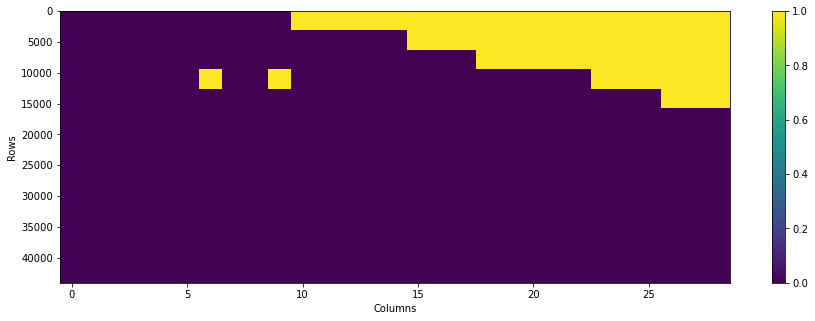

In [157]:
plt.figure(figsize=(15, 5))
plt.imshow(df_knn_sorted.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.show()

In [159]:
merge_cleaned = merge_cleaned.drop(
    columns=features_historical
)


merge_cleaned = merge_cleaned.merge(df_knn_sorted, on=["geo_code", "year"], how="left")
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,pct_aian,life_expectancy,diabetes_monitoring,pct_age_18_44,pct_age_45_64,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,single_parent_households_x,adult_obesity,adult_smoking,children_eligible_for_free_lunch,high_school_graduation,low_birthweight,median_household_income,motor_vehicle_crash_deaths,pcp,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_pcp,sexually_transmitted_infections,college_completion,gini_index,median_age,poverty_x,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,uninsured_children_x,uninsured_x,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,75.607833,0.8149,0.360926,0.248048,0.264694,0.361352,0.246320,0.127635,0.290109,0.360473,0.249884,0.099535,0.002,0.030,0.037,0.179785,0.300,0.281400,0.161946,0.715190,0.0883,53255.0,28.8,52.224775,4.14,0.2586,5.48,9778.1,91.803383,1914.800000,370.0,0.217477,0.405,36.2,0.214724,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,77.707111,0.7916,0.322036,0.279969,0.224343,0.316290,0.286409,0.172958,0.242230,0.328048,0.273230,0.156492,0.004,0.054,0.027,0.138206,0.245,0.

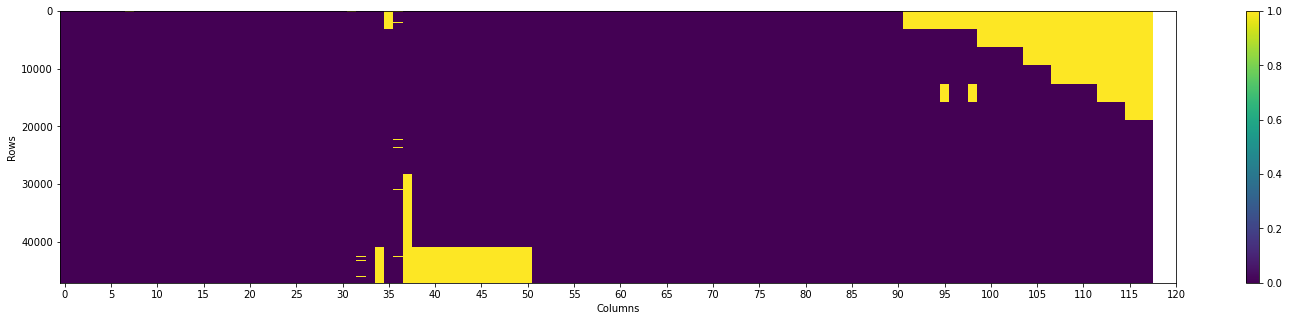

In [160]:
plt.figure(figsize=(25, 5))
plt.imshow(merge_cleaned.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.xticks(np.arange(0, 125, 5))
plt.show()

In [161]:
merge_cleaned.to_csv('merge_cleaned_091524_2.csv')

In [190]:
merge_cleaned = pd.read_csv('merge_cleaned_091524_2.csv', index_col=0, dtype={"geo_code": str, "year": int})
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english_x,uninsured_adults_x,long_commute_driving_alone_x,driving_alone_to_work_x,income_inequality_x,population_x,pct_under_18,pct_65_and_older_x,pct_female_x,unemployment_rate,pct_hispanic_x,pct_non_hispanic_white_x,pct_non_hispanic_black_x,pct_indigenous,pct_asian_x,pct_nhpi_x,severe_housing_problems_x,homeownership_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,severe_housing_cost_burden_x,pct_households_with_high_housing_costs_x,high_school_completion_x,some_college_x,children_in_single_parent_households_x,children_in_poverty_x,teen_births_x,gender_pay_gap_x,mobility_index_std,pct_aian,life_expectancy,diabetes_monitoring,pct_age_18_44,pct_age_45_64,pct_female_pop_0_17_x,pct_female_pop_18_44_x,pct_female_pop_45_64_x,pct_female_pop_65+_x,pct_male_pop_0_17_x,pct_male_pop_18_44_x,pct_male_pop_45_64_x,pct_male_pop_65+_x,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,single_parent_households_x,adult_obesity,adult_smoking,children_eligible_for_free_lunch,high_school_graduation,low_birthweight,median_household_income,motor_vehicle_crash_deaths,pcp,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_pcp,sexually_transmitted_infections,college_completion,gini_index,median_age,poverty_x,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,uninsured_children_x,uninsured_x,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,75.607833,0.8149,0.360926,0.248048,0.264694,0.361352,0.246320,0.127635,0.290109,0.360473,0.249884,0.099535,0.002,0.030,0.037,0.179785,0.300,0.281400,0.161946,0.715190,0.0883,53255.0,28.8,52.224775,4.14,0.2586,5.48,9778.1,91.803383,1914.800000,370.0,0.217477,0.405,36.2,0.214724,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,77.707111,0.7916,0.322036,0.279969,0.224343,0.316290,0.286409,0.172958,0.242230,0.328048,0.273230,0.156492,0.004,0.054,0.027,0.138206,0.245,0.

In [192]:
columns = [
    "year",
    "geo_code",
    "state",
    "state_code",
    "geo_full_name",
    "geo_name",
    "pct_not_proficient_in_english",
    "uninsured_adults",
    "long_commute_driving_alone",
    "driving_alone_to_work",
    "income_inequality",
    "population",
    "pct_under_18",
    "pct_65_and_older",
    "pct_female",
    "unemployment_rate",
    "pct_hispanic",
    "pct_non_hispanic_white",
    "pct_non_hispanic_black",
    "pct_indigenous",
    "pct_asian",
    "pct_nhpi",
    "severe_housing_problems",
    "homeownership",
    "pct_households_with_lack_of_kitchen_or_plumbing_facilities",
    "pct_households_with_overcrowding",
    "severe_housing_cost_burden",
    "pct_households_with_high_housing_costs",
    "high_school_completion",
    "some_college",
    "children_in_single_parent_households",
    "children_in_poverty",
    "teen_births",
    "gender_pay_gap",
    "mobility_index_std",
    "pct_aian",
    "life_expectancy",
    "diabetes_monitoring",
    "pct_age_18_44",
    "pct_age_45_64",
    "pct_female_pop_0_17",
    "pct_female_pop_18_44",
    "pct_female_pop_45_64",
    "pct_female_pop_65+",
    "pct_male_pop_0_17",
    "pct_male_pop_18_44",
    "pct_male_pop_45_64",
    "pct_male_pop_65+",
    "pct_moved_from_abroad",
    "pct_moved_from_diff_county_diff_state",
    "pct_moved_from_diff_county_same_state",
    "single_parent_households",
    "adult_obesity",
    "adult_smoking",
    "children_eligible_for_free_lunch",
    "high_school_graduation",
    "low_birthweight",
    "median_household_income",
    "motor_vehicle_crash_deaths",
    "pcp",
    "poor_mental_health_days",
    "poor_or_fair_health",
    "poor_physical_health_days",
    "premature_death",
    "preventable_hospital_stays",
    "ratio_of_pop_to_pcp",
    "sexually_transmitted_infections",
    "college_completion",
    "gini_index",
    "median_age",
    "poverty",
    "violent_crime",
    "pct_mgmt_bus_sci_art_occupations",
    "pct_service_occupations",
    "pct_sales_and_office_occupations",
    "pct_nat_res_constr_maint_occupations",
    "pct_prod_transp_mat_moving_occupations",
    "pct_agriculture_hunting_and_mining",
    "pct_construction",
    "pct_manufacturing",
    "pct_wholesale_trade",
    "pct_retail_trade",
    "pct_transportation_and_utilities",
    "pct_information",
    "pct_finance_insurance_and_real_estate",
    "pct_professional_management_and_scientific_services",
    "pct_educational_and_health_services",
    "pct_arts_entertainment_and_accommodation_services",
    "pct_public_administration",
    "pct_other_services",
    "pct_moved_within_same_county",
    "diabetes_prevalence",
    "excessive_drinking",
    "hiv_prevalence",
    "mammography_screening",
    "mental_health_providers",
    "pct_rural",
    "physical_inactivity",
    "ratio_of_pop_to_mental_health",
    "dentists",
    "limited_access_to_healthy_foods",
    "ratio_of_pop_to_dentists",
    "uninsured_children",
    "uninsured",
    "air_pollution_particulate_matter",
    "drinking_water_violations",
    "premature_age_adjusted_mortality",
    "access_to_exercise_opportunities",
    "alcohol_impaired_driving_deaths",
    "food_environment_index",
    "food_insecurity",
    "injury_deaths",
    "other_pcp",
    "ratio_of_pop_to_pcp_other_than_physicians",
    "social_associations",
    "frequent_mental_distress",
    "frequent_physical_distress",
    "insufficient_sleep",
]

merge_cleaned.columns = columns
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english,uninsured_adults,long_commute_driving_alone,driving_alone_to_work,income_inequality,population,pct_under_18,pct_65_and_older,pct_female,unemployment_rate,pct_hispanic,pct_non_hispanic_white,pct_non_hispanic_black,pct_indigenous,pct_asian,pct_nhpi,severe_housing_problems,homeownership,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,severe_housing_cost_burden,pct_households_with_high_housing_costs,high_school_completion,some_college,children_in_single_parent_households,children_in_poverty,teen_births,gender_pay_gap,mobility_index_std,pct_aian,life_expectancy,diabetes_monitoring,pct_age_18_44,pct_age_45_64,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,single_parent_households,adult_obesity,adult_smoking,children_eligible_for_free_lunch,high_school_graduation,low_birthweight,median_household_income,motor_vehicle_crash_deaths,pcp,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,premature_death,preventable_hospital_stays,ratio_of_pop_to_pcp,sexually_transmitted_infections,college_completion,gini_index,median_age,poverty,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,uninsured_children,uninsured,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,2010,01001,Alabama,AL,"Autauga County, Alabama",Autauga,0.009389,0.140,31.206695,0.868566,3.930128,53155.0,0.277020,0.114006,0.515003,0.062076,0.023196,0.775524,0.178215,0.002897,0.006547,0.000000,0.096612,0.775180,0.009737,0.002029,0.144260,0.144260,0.853323,0.501062,0.295363,0.138000,47.513321,66.048439,16.51,NaN,75.607833,0.8149,0.360926,0.248048,0.264694,0.361352,0.246320,0.127635,0.290109,0.360473,0.249884,0.099535,0.002,0.030,0.037,0.179785,0.300,0.281400,0.161946,0.715190,0.0883,53255.0,28.8,52.224775,4.14,0.2586,5.48,9778.1,91.803383,1914.800000,370.0,0.217477,0.405,36.2,0.214724,256.487012,0.293291,0.169221,0.290703,0.115690,0.131096,0.009449,0.077400,0.141284,0.031141,0.126659,0.044246,0.011257,0.065322,0.069964,0.174315,0.086767,0.116676,0.045520,0.068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,01003,Alabama,AL,"Baldwin County, Alabama",Baldwin,0.022074,0.209,33.724273,0.835134,4.214440,175791.0,0.233084,0.164912,0.511340,0.065605,0.038955,0.840777,0.093793,0.006064,0.006536,0.000034,0.116501,0.767301,0.011083,0.004721,0.174773,0.174773,0.875757,0.576810,0.285221,0.193264,31.854171,68.766137,21.87,NaN,77.707111,0.7916,0.322036,0.279969,0.224343,0.316290,0.286409,0.172958,0.242230,0.328048,0.273230,0.156492,0.004,0.054,0.027,0.138206,0.245,0.230900,0.204360,0.670437,0.0877,50147.0,23.6,70.741370,4.06,0.1338,3.57,82

## Random Forest Regressor and Iterative Imputer

In [162]:
columns_historical = [
    "year",
    "geo_code",
    "adult_obesity",
    "adult_smoking",
    "children_eligible_for_free_lunch",
    "children_in_poverty_x",
    "children_in_single_parent_households_x",
    "driving_alone_to_work_x",
    "gender_pay_gap_x",
    "high_school_completion_x",
    "high_school_graduation",
    "homeownership_x",
    "income_inequality_x",
    "life_expectancy",
    "long_commute_driving_alone_x",
    "low_birthweight",
    "median_household_income",
    "motor_vehicle_crash_deaths",
    "pcp",
    "pct_65_and_older_x",
    "pct_asian_x",
    "pct_female_x",
    "pct_hispanic_x",
    "pct_households_with_high_housing_costs_x",
    "pct_households_with_lack_of_kitchen_or_plumbing_facilities_x",
    "pct_households_with_overcrowding_x",
    "pct_indigenous",
    "pct_non_hispanic_black_x",
    "pct_non_hispanic_white_x",
    "pct_not_proficient_in_english_x",
    "pct_under_18",
    "poor_mental_health_days",
    "poor_or_fair_health",
    "poor_physical_health_days",
    "population_x",
    "premature_death",
    "preventable_hospital_stays",
    "ratio_of_pop_to_pcp",
    "severe_housing_cost_burden_x",
    "severe_housing_problems_x",
    "sexually_transmitted_infections",
    "some_college_x",
    "teen_births_x",
    "unemployment_rate",
    "uninsured_x",
    "uninsured_children_x",
    "uninsured_adults_x",
    "diabetes_prevalence",
    "excessive_drinking",
    "hiv_prevalence",
    "mammography_screening",
    "mental_health_providers",
    "pct_rural",
    "physical_inactivity",
    "ratio_of_pop_to_mental_health",
    "dentists",
    "limited_access_to_healthy_foods",
    "ratio_of_pop_to_dentists",
    "air_pollution_particulate_matter",
    "drinking_water_violations",
    "premature_age_adjusted_mortality",
    "access_to_exercise_opportunities",
    "alcohol_impaired_driving_deaths",
    "food_environment_index",
    "food_insecurity",
    "injury_deaths",
    "other_pcp",
    "ratio_of_pop_to_pcp_other_than_physicians",
    "social_associations",
    "frequent_mental_distress",
    "frequent_physical_distress",
    "insufficient_sleep",
]

In [163]:
merge_hist = merge_cleaned[columns_historical]
merge_hist = merge_hist.sort_values(by=["geo_code", "year"])
merge_hist = merge_hist.set_index(["geo_code", "year"])
merge_hist.head()

adult_obesity  adult_smoking  children_eligible_for_free_lunch  \
geo_code year                                                                   
01001    2010          0.300         0.2814                          0.161946   
         2011          0.315         0.2740                          0.288000   
         2012          0.341         0.2460                          0.288000   
         2013          0.341         0.2350                          0.361167   
         2014          0.305         0.2170                          0.361167   

               children_in_poverty_x  children_in_single_parent_households_x  \
geo_code year                                                                  
01001    2010               0.138000                                0.295363   
         2011               0.149000                                0.264716   
         2012               0.159811                                0.301249   
         2013               0.174717                                0.296294   
         2014               0.186381                                0.273063   

               driving_alone_to_work_x  gender_pay_gap_x  \
geo_code year                                              
01001    2010                 0.868566         66.048439   
         2011                 0.873219         65.685521   
         2012                 0.877878         63.094541   
         2013                 0.885189         65.520777   
         2014                 0.892301         66.392790   

               high_school_completion_x  high_school_graduation  \
geo_code year                                                     
01001    2010                  0.853323                 0.71519   
         2011                  0.864521                 0.74000   
         2012                  0.851127                 0.84500   
         2013                  0.855922                 0.80000   
         2014                  0.861673                 0.80000   

               homeownership_x  income_inequality_x  life_expectancy  \
geo_code year                                                          
01001    2010         0.775180             3.930128        75.607833   
         2011         0.777478             3.899220        75.400943   
         2012         0.776964             4.037353        75.618037   
         2013         0.768173             4.186341        75.703890   
         2014         0.750985             4.338252        76.094028   

               long_commute_driving_alone_x  low_birthweight  \
geo_code year                                                  
01001    2010                     31.206695           0.0883   
         2011                     31.917751           0.0945   
         2012                     32.996855           0.0970   
         2013                     35.197271           0.0940   
         2014                     37.069998           0.0930   

               median_household_income  motor_vehicle_crash_deaths        pcp  \
geo_code year                                                                   
01001    2010                  53255.0                   28.800000  52.224775   
         2011                  51622.0                   28.300000   0.000437   
         2012                  53049.0                   28.383137   0.000437   
         2013                  48863.0                   23.917000   0.000366   
         2014                  51441.0                   23.917000   0.000380   

               pct_65_and_older_x  pct_asian_x  pct_female_x  pct_hispanic_x  \
geo_code year                                                                  
01001    2010            0.114006     0.006547      0.515003        0.023196   
         2011            0.116547     0.007137      0.514793        0.024062   
         2012            0.122587     0.008042      0.513867        0.023997   
         2013            0.126487     0.009562      0.512029        0.024

In [ ]:
geo_code_list = list(set([x[0] for x in merge_hist.index.tolist()]))

In [ ]:
# group data for each geocode together to pass into the Imputer

df_list = []
i = 0

for geo_code in geo_code_list:
    i += 1
    df = merge_hist.xs(geo_code, level="geo_code")
    print("Working on", i, ": ", geo_code)

    # Create a RandomForest Regressor to handle the imputation
    rf = RandomForestRegressor(n_estimators=100, random_state=0)

    # Create an Iterative Imputer using the Random Forest as an estimator
    imputer = IterativeImputer(estimator=rf, max_iter=10, random_state=0)

    try:
        # Apply the imputer to fill missing values
        df_imputed = pd.DataFrame(
            imputer.fit_transform(df), columns=df.columns.tolist(), index=df.index
        )
        df_list.append(df_imputed)

    except ValueError as e:
        print(e)
        df_list.append(np.nan)

In [ ]:
# merge each county data and predictions into single dataframe
df_list_2 = []
i = 0

for i in range(3159):

    if type(df_list[i]) == float:
        pass
    else:
        df = df_list[i].copy()
        df = df.reset_index()
        df["geo_code"] = geo_code_list[i]
        df_list_2.append(df)
    i += 1

In [ ]:
random_forest_df = pd.concat(df_list_2, axis=0)
random_forest_df.head()

In [183]:
random_forest_df = pd.read_csv('random_forest_df.csv', index_col=0, dtype={"geo_code": str, "year": int})
random_forest_df = pd.concat([random_forest_df['geo_code'], random_forest_df.iloc[:, :-1]], axis=1)
random_forest_sorted = random_forest_df.sort_values(by=['year','geo_code'])
random_forest_sorted = random_forest_sorted.reset_index(drop=True)
random_forest_sorted.head()

,geo_code,year,adult_obesity,adult_smoking,children_eligible_for_free_lunch,children_in_poverty_x,children_in_single_parent_households_x,driving_alone_to_work_x,gender_pay_gap_x,high_school_completion_x,high_school_graduation,homeownership_x,income_inequality_x,life_expectancy,long_commute_driving_alone_x,low_birthweight,median_household_income,motor_vehicle_crash_deaths,pcp,pct_65_and_older_x,pct_aapi,pct_female_x,pct_hispanic_x,pct_households_with_high_housing_costs_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,pct_indigenous,pct_non_hispanic_black_x,pct_non_hispanic_white_x,pct_not_proficient_in_english_x,pct_under_18,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,population_x,premature_death,preventable_hospital_stays,ratio_of_pop_to_pcp,severe_housing_cost_burden_x,severe_housing_problems_x,sexually_transmitted_infections,some_college_x,teen_births_x,unemployment_rate,uninsured_adults_x,diabetes_prevalence,excessive_drinking,hiv_prevalence,mammography_screening,mental_health_providers,pct_asian,pct_rural,physical_inactivity,ratio_of_pop_to_mental_health,dentists,limited_access_to_healthy_foods,ratio_of_pop_to_dentists,air_pollution_particulate_matter,drinking_water_violations,premature_age_adjusted_mortality,access_to_exercise_opportunities,alcohol_impaired_driving_deaths,food_environment_index,food_insecurity,injury_deaths,other_pcp,ratio_of_pop_to_pcp_other_than_physicians,social_associations,frequent_mental_distress,frequent_physical_distress,insufficient_sleep
0,01001,2010,0.300,0.281400,0.161946,0.138000,0.295363,0.868566,66.048439,0.853323,0.715190,0.775180,3.930128,75.607833,31.206695,0.0883,53255.0,28.8,52.224775,0.114006,0.006547,0.515003,0.023196,0.144260,0.009737,0.002029,0.002897,0.178215,0.775524,0.009389,0.277020,4.14,0.2586,5.48,53155.0,9778.1,91.803383,1914.800000,0.144260,0.096612,370.0,0.501062,47.513321,0.062076,0.140,0.11818,0.154040,184.736484,0.658644,0.000050,0.007526,0.441005,0.32180,37113.103370,0.000262,0.152482,4120.317674,12.5700,0.000000,441.808519,0.690674,0.284338,7.219912,0.13821,72.504788,0.000248,5074.504751,13.455842,0.135139,0.127901,0.369589
1,01003,2010,0.245,0.230900,0.204360,0.193264,0.285221,0.835134,68.766137,0.875757,0.670437,0.767301,4.214440,77.707111,33.724273,0.0877,50147.0,23.6,70.741370,0.164912,0.006570,0.511340,0.038955,0.174773,0.011083,0.004721,0.006064,0.093793,0.840777,0.022074,0.233084,4.06,0.1338,3.57,175791.0,8221.7,65.391299,1413.600000,0.174773,0.116501,245.9,0.576810,31.854171,0.065605,0.209,0.10766,0.190255,177.725095,0.688273,0.000326,0.006991,0.500277,0.25185,4917.923172,0.000464,0.037806,2177.442032,11.5998,0.253189,366.591291,0.652278,0.321341,7.651281,0.13214,74.283360,0.000399,2746.755160,11.480511,0.136337,0.116326,0.335911
2,01005,2010,0.364,0.226800,0.362199,0.341000,0.519583,0.789877,74.681632,0.718629,0.563422,0.680449,5.835112,75.719796,26.762889,0.1100,33219.0,30.4,40.744262,0.137406,0.001769,0.471028,0.045958,0.171885,0.013783,0.003675,0.003141,0.464674,0.472111,0.021339,0.224918,3.84,0.2442,6.11,27699.0,10686.1,92.297198,2454.333333,0.171885,0.158040,585.7,0.364850,87.486157,0.095894,0.151,0.15103,0.110813,382.090476,0.612960,0.000076,0.003827,0.695329,0.33396,16797.223333,0.000361,0.094833,2771.724944,12.0202,0.187097,485.936754,0.364483,0.404637,5.436531,0.22355,66.512793,0.000335,4745.385553,8.042733,0.161515,0.164287,0.398820
3,01007,2010,0.317,0.252442,0.161418,0.242000,0.354949,0.849911,69.830180,0.745458,0.603834,0.829190,4.332317,73.576596,43.250507,0.0911,41770.0,41.3,42.105263,0.124370,0.001592,0.462096,0.005927,0.116541,0.001881,0.000000,0.001769,0.152587,0.836090,0.008245,0.234321,5.31,0.1817,4.22,22610.0,13069.5,96.794256,2375.000000,0.116541,0.066255,284.0,0.322305,30.716724,0.091338,0.177,0.12091,0.138328,142.813645,0.594060,0.000070,0.001800,0.805111,0.36869,-5432.008789,0.000211,0.133676,4788.351167,11.6488,0.000000,549.210090,0.302128,0.275008,7.649525,0.

In [193]:
random_forest_df.columns.tolist()

['geo_code',
 'year',
 'adult_obesity',
 'adult_smoking',
 'children_eligible_for_free_lunch',
 'children_in_poverty_x',
 'children_in_single_parent_households_x',
 'driving_alone_to_work_x',
 'gender_pay_gap_x',
 'high_school_completion_x',
 'high_school_graduation',
 'homeownership_x',
 'income_inequality_x',
 'life_expectancy',
 'long_commute_driving_alone_x',
 'low_birthweight',
 'median_household_income',
 'motor_vehicle_crash_deaths',
 'pcp',
 'pct_65_and_older_x',
 'pct_aapi',
 'pct_female_x',
 'pct_hispanic_x',
 'pct_households_with_high_housing_costs_x',
 'pct_households_with_lack_of_kitchen_or_plumbing_facilities_x',
 'pct_households_with_overcrowding_x',
 'pct_indigenous',
 'pct_non_hispanic_black_x',
 'pct_non_hispanic_white_x',
 'pct_not_proficient_in_english_x',
 'pct_under_18',
 'poor_mental_health_days',
 'poor_or_fair_health',
 'poor_physical_health_days',
 'population_x',
 'premature_death',
 'preventable_hospital_stays',
 'ratio_of_pop_to_pcp',
 'severe_housing_cost_

In [194]:
columns = [
        "geo_code",
        "year",
        "adult_obesity",
        "adult_smoking",
        "children_eligible_for_free_lunch",
        "children_in_poverty",
        "children_in_single_parent_households",
        "driving_alone_to_work",
        "gender_pay_gap",
        "high_school_completion",
        "high_school_graduation",
        "homeownership",
        "income_inequality",
        "life_expectancy",
        "long_commute_driving_alone",
        "low_birthweight",
        "median_household_income",
        "motor_vehicle_crash_deaths",
        "pcp",
        "pct_65_and_older",
        "pct_aapi",
        "pct_female",
        "pct_hispanic",
        "pct_households_with_high_housing_costs",
        "pct_households_with_lack_of_kitchen_or_plumbing_facilities",
        "pct_households_with_overcrowding",
        "pct_indigenous",
        "pct_non_hispanic_black",
        "pct_non_hispanic_white",
        "pct_not_proficient_in_english",
        "pct_under_18",
        "poor_mental_health_days",
        "poor_or_fair_health",
        "poor_physical_health_days",
        "population",
        "premature_death",
        "preventable_hospital_stays",
        "ratio_of_pop_to_pcp",
        "severe_housing_cost_burden",
        "severe_housing_problems",
        "sexually_transmitted_infections",
        "some_college",
        "teen_births",
        "unemployment_rate",
        "uninsured_adults",
        "diabetes_prevalence",
        "excessive_drinking",
        "hiv_prevalence",
        "mammography_screening",
        "mental_health_providers",
        "pct_asian",
        "pct_rural",
        "physical_inactivity",
        "ratio_of_pop_to_mental_health",
        "dentists",
        "limited_access_to_healthy_foods",
        "ratio_of_pop_to_dentists",
        "air_pollution_particulate_matter",
        "drinking_water_violations",
        "premature_age_adjusted_mortality",
        "access_to_exercise_opportunities",
        "alcohol_impaired_driving_deaths",
        "food_environment_index",
        "food_insecurity",
        "injury_deaths",
        "other_pcp",
        "ratio_of_pop_to_pcp_other_than_physicians",
        "social_associations",
        "frequent_mental_distress",
        "frequent_physical_distress",
        "insufficient_sleep",

]

random_forest_df.columns = columns

In [195]:
merge_cleaned = merge_cleaned.merge(random_forest_sorted, on=["geo_code", "year"], how="left")
merge_cleaned.head()

,year,geo_code,state,state_code,geo_full_name,geo_name,pct_not_proficient_in_english,uninsured_adults,long_commute_driving_alone,driving_alone_to_work,income_inequality,population,pct_under_18_x,pct_65_and_older,pct_female,unemployment_rate_x,pct_hispanic,pct_non_hispanic_white,pct_non_hispanic_black,pct_indigenous_x,pct_asian_x,pct_nhpi,severe_housing_problems,homeownership,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,severe_housing_cost_burden,pct_households_with_high_housing_costs,high_school_completion,some_college,children_in_single_parent_households,children_in_poverty,teen_births,gender_pay_gap,mobility_index_std,pct_aian,life_expectancy_x,diabetes_monitoring,pct_age_18_44,pct_age_45_64,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,single_parent_households,adult_obesity_x,adult_smoking_x,children_eligible_for_free_lunch_x,high_school_graduation_x,low_birthweight_x,median_household_income_x,motor_vehicle_crash_deaths_x,pcp_x,poor_mental_health_days_x,poor_or_fair_health_x,poor_physical_health_days_x,premature_death_x,preventable_hospital_stays_x,ratio_of_pop_to_pcp_x,sexually_transmitted_infections_x,college_completion,gini_index,median_age,poverty,violent_crime,pct_mgmt_bus_sci_art_occupations,pct_service_occupations,pct_sales_and_office_occupations,pct_nat_res_constr_maint_occupations,pct_prod_transp_mat_moving_occupations,pct_agriculture_hunting_and_mining,pct_construction,pct_manufacturing,pct_wholesale_trade,pct_retail_trade,pct_transportation_and_utilities,pct_information,pct_finance_insurance_and_real_estate,pct_professional_management_and_scientific_services,pct_educational_and_health_services,pct_arts_entertainment_and_accommodation_services,pct_public_administration,pct_other_services,pct_moved_within_same_county,diabetes_prevalence_x,excessive_drinking_x,hiv_prevalence_x,mammography_screening_x,mental_health_providers_x,pct_rural_x,physical_inactivity_x,ratio_of_pop_to_mental_health_x,dentists_x,limited_access_to_healthy_foods_x,ratio_of_pop_to_dentists_x,uninsured_children,uninsured,air_pollution_particulate_matter_x,drinking_water_violations_x,premature_age_adjusted_mortality_x,access_to_exercise_opportunities_x,alcohol_impaired_driving_deaths_x,food_environment_index_x,food_insecurity_x,injury_deaths_x,other_pcp_x,ratio_of_pop_to_pcp_other_than_physicians_x,social_associations_x,frequent_mental_distress_x,frequent_physical_distress_x,insufficient_sleep_x,adult_obesity_y,adult_smoking_y,children_eligible_for_free_lunch_y,children_in_poverty_x,children_in_single_parent_households_x,driving_alone_to_work_x,gender_pay_gap_x,high_school_completion_x,high_school_graduation_y,homeownership_x,income_inequality_x,life_expectancy_y,long_commute_driving_alone_x,low_birthweight_y,median_household_income_y,motor_vehicle_crash_deaths_y,pcp_y,pct_65_and_older_x,pct_aapi,pct_female_x,pct_hispanic_x,pct_households_with_high_housing_costs_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding_x,pct_indigenous_y,pct_non_hispanic_black_x,pct_non_hispanic_white_x,pct_not_proficient_in_english_x,pct_under_18_y,poor_mental_health_days_y,poor_or_fair_health_y,poor_physical_health_days_y,population_x,premature_death_y,preventable_hospital_stays_y,ratio_of_pop_to_pcp_y,severe_housing_cost_burden_x,severe_housing_problems_x,sexually_transmitted_infections_y,some_college_x,teen_births_x,unemployment_rate_y,uninsured_adults_x,diabetes_prevalence_y,excessive_drinking_y,hiv_prevalence_y,mammography_screening_y,mental_health_providers_y,pct_asian_y,pct_rural_y,physical_inactivity_y,ratio_of_pop_to_mental_health_y,dentists_y,limited_access_to_healthy_foods_y,ratio_of_pop_to_dentists_y,air_pollution_particulate_matter_y,drinking_water_violations_y,prem

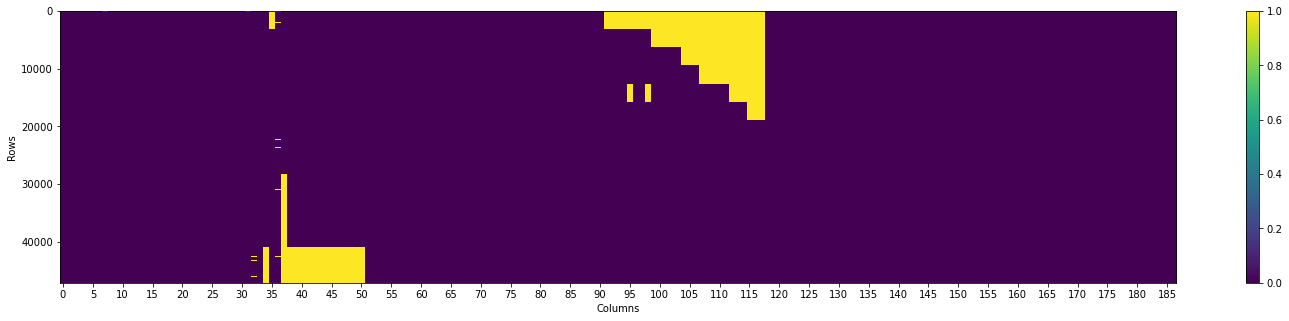

In [196]:
plt.figure(figsize=(25, 5))
plt.imshow(merge_cleaned.isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.xticks(np.arange(0, 190, 5))
plt.show()

In [197]:
merge_cleaned.isna().sum()

year                                                                0
geo_code                                                            0
state                                                              15
state_code                                                         15
geo_full_name                                                      15
geo_name                                                           15
pct_not_proficient_in_english                                      34
uninsured_adults                                                   14
long_commute_driving_alone                                          4
driving_alone_to_work                                               1
income_inequality                                                  42
population                                                          1
pct_under_18_x                                                      1
pct_65_and_older                                                    1
pct_female          

In [199]:
sorted(merge_cleaned.columns.tolist())

['access_to_exercise_opportunities_x',
 'access_to_exercise_opportunities_y',
 'adult_obesity_x',
 'adult_obesity_y',
 'adult_smoking_x',
 'adult_smoking_y',
 'air_pollution_particulate_matter_x',
 'air_pollution_particulate_matter_y',
 'alcohol_impaired_driving_deaths_x',
 'alcohol_impaired_driving_deaths_y',
 'children_eligible_for_free_lunch_x',
 'children_eligible_for_free_lunch_y',
 'children_in_poverty',
 'children_in_poverty_x',
 'children_in_single_parent_households',
 'children_in_single_parent_households_x',
 'college_completion',
 'dentists_x',
 'dentists_y',
 'diabetes_monitoring',
 'diabetes_prevalence_x',
 'diabetes_prevalence_y',
 'drinking_water_violations_x',
 'drinking_water_violations_y',
 'driving_alone_to_work',
 'driving_alone_to_work_x',
 'excessive_drinking_x',
 'excessive_drinking_y',
 'food_environment_index_x',
 'food_environment_index_y',
 'food_insecurity_x',
 'food_insecurity_y',
 'frequent_mental_distress_x',
 'frequent_mental_distress_y',
 'frequent_phys

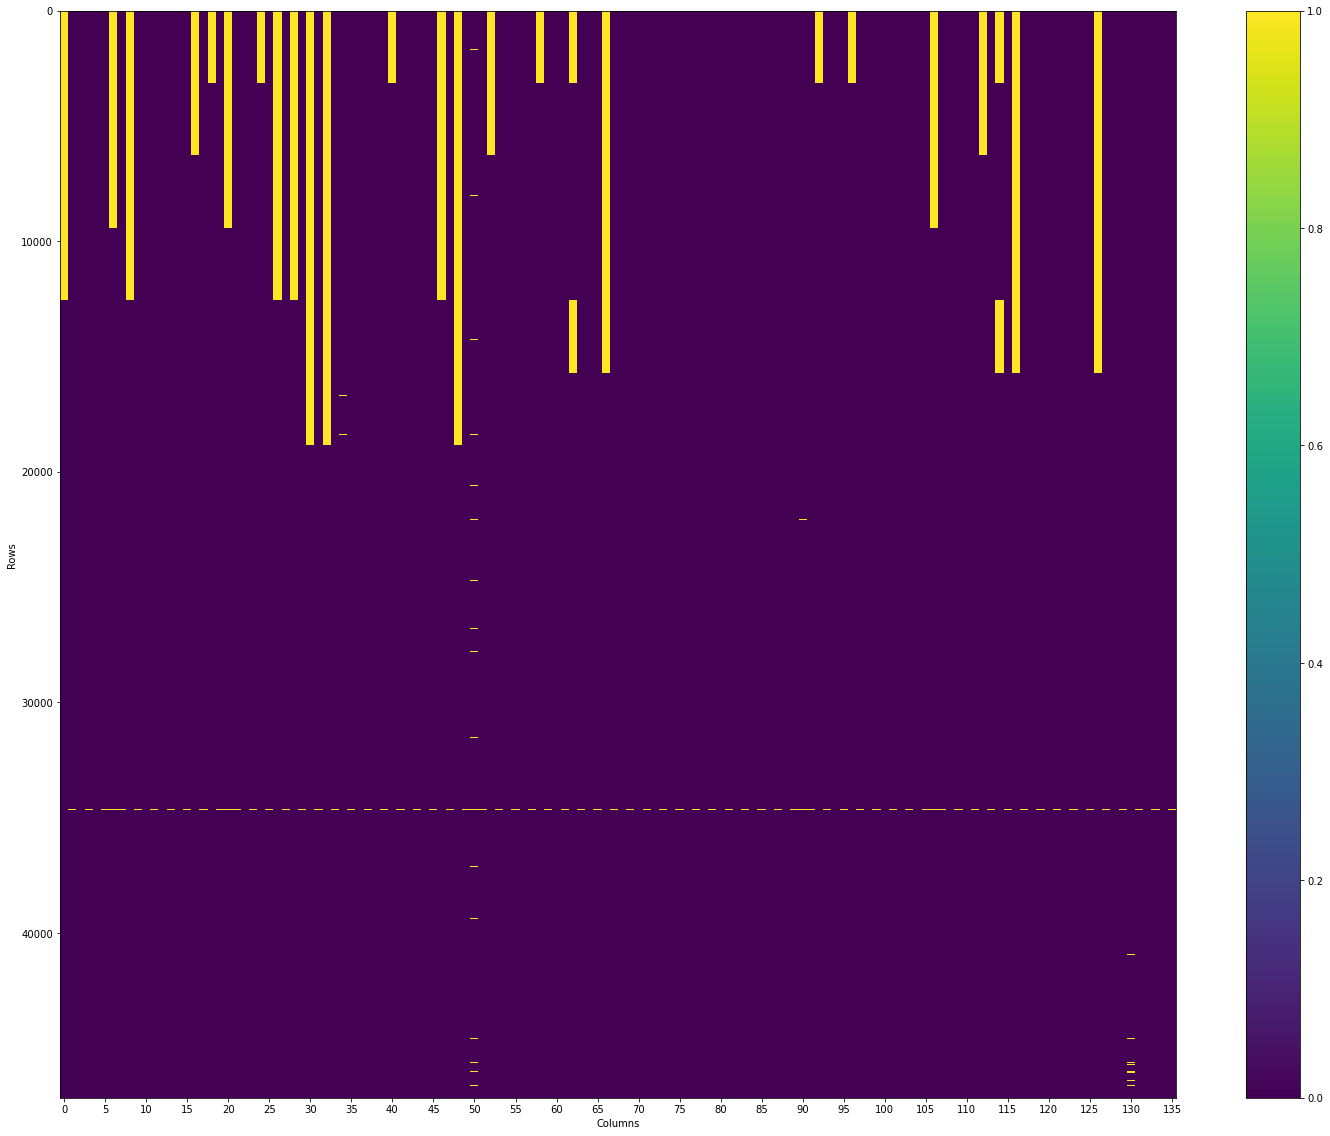

In [205]:
columns = [
    "access_to_exercise_opportunities_x",
    "access_to_exercise_opportunities_y",
    "adult_obesity_x",
    "adult_obesity_y",
    "adult_smoking_x",
    "adult_smoking_y",
    "air_pollution_particulate_matter_x",
    "air_pollution_particulate_matter_y",
    "alcohol_impaired_driving_deaths_x",
    "alcohol_impaired_driving_deaths_y",
    "children_eligible_for_free_lunch_x",
    "children_eligible_for_free_lunch_y",
    "children_in_poverty",
    "children_in_poverty_x",
    "children_in_single_parent_households",
    "children_in_single_parent_households_x",
    "dentists_x",
    "dentists_y",
    "diabetes_prevalence_x",
    "diabetes_prevalence_y",
    "drinking_water_violations_x",
    "drinking_water_violations_y",
    "driving_alone_to_work",
    "driving_alone_to_work_x",
    "excessive_drinking_x",
    "excessive_drinking_y",
    "food_environment_index_x",
    "food_environment_index_y",
    "food_insecurity_x",
    "food_insecurity_y",
    "frequent_mental_distress_x",
    "frequent_mental_distress_y",
    "frequent_physical_distress_x",
    "frequent_physical_distress_y",
    "gender_pay_gap",
    "gender_pay_gap_x",
    "high_school_completion",
    "high_school_completion_x",
    "high_school_graduation_x",
    "high_school_graduation_y",
    "hiv_prevalence_x",
    "hiv_prevalence_y",
    "homeownership",
    "homeownership_x",
    "income_inequality",
    "income_inequality_x",
    "injury_deaths_x",
    "injury_deaths_y",
    "insufficient_sleep_x",
    "insufficient_sleep_y",
    "life_expectancy_x",
    "life_expectancy_y",
    "limited_access_to_healthy_foods_x",
    "limited_access_to_healthy_foods_y",
    "long_commute_driving_alone",
    "long_commute_driving_alone_x",
    "low_birthweight_x",
    "low_birthweight_y",
    "mammography_screening_x",
    "mammography_screening_y",
    "median_household_income_x",
    "median_household_income_y",
    "mental_health_providers_x",
    "mental_health_providers_y",
    "motor_vehicle_crash_deaths_x",
    "motor_vehicle_crash_deaths_y",
    "other_pcp_x",
    "other_pcp_y",
    "pcp_x",
    "pcp_y",
    "pct_65_and_older",
    "pct_65_and_older_x",
    "pct_asian_x",
    "pct_asian_y",
    "pct_female",
    "pct_female_x",
    "pct_hispanic",
    "pct_hispanic_x",
    "pct_households_with_high_housing_costs",
    "pct_households_with_high_housing_costs_x",
    "pct_households_with_lack_of_kitchen_or_plumbing_facilities",
    "pct_households_with_lack_of_kitchen_or_plumbing_facilities_x",
    "pct_households_with_overcrowding",
    "pct_households_with_overcrowding_x",
    "pct_indigenous_x",
    "pct_indigenous_y",
    "pct_non_hispanic_black",
    "pct_non_hispanic_black_x",
    "pct_non_hispanic_white",
    "pct_non_hispanic_white_x",
    "pct_not_proficient_in_english",
    "pct_not_proficient_in_english_x",
    "pct_rural_x",
    "pct_rural_y",
    "pct_under_18_x",
    "pct_under_18_y",
    "physical_inactivity_x",
    "physical_inactivity_y",
    "poor_mental_health_days_x",
    "poor_mental_health_days_y",
    "poor_or_fair_health_x",
    "poor_or_fair_health_y",
    "poor_physical_health_days_x",
    "poor_physical_health_days_y",
    "population",
    "population_x",
    "premature_age_adjusted_mortality_x",
    "premature_age_adjusted_mortality_y",
    "premature_death_x",
    "premature_death_y",
    "preventable_hospital_stays_x",
    "preventable_hospital_stays_y",
    "ratio_of_pop_to_dentists_x",
    "ratio_of_pop_to_dentists_y",
    "ratio_of_pop_to_mental_health_x",
    "ratio_of_pop_to_mental_health_y",
    "ratio_of_pop_to_pcp_other_than_physicians_x",
    "ratio_of_pop_to_pcp_other_than_physicians_y",
    "ratio_of_pop_to_pcp_x",
    "ratio_of_pop_to_pcp_y",
    "severe_housing_cost_burden",
    "severe_housing_cost_burden_x",
    "severe_housing_problems",
    "severe_housing_problems_x",
    "sexually_transmitted_infections_x",
    "sexually_transmitted_infections_y",
    "social_associations_x",
    "social_associations_y",
    "some_college",
    "some_college_x",
    "teen_births",
    "teen_births_x",
    "unemployment_rate_x",
    "unemployment_rate_y",
    "uninsured_adults",
    "uninsured_adults_x",
]

plt.figure(figsize=(25, 20))
plt.imshow(merge_cleaned[columns].isna(), aspect="auto", interpolation="nearest", cmap="viridis")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.xticks(np.arange(0, 140, 5))
plt.show()

In [207]:
merge_cleaned = merge_cleaned[sorted(merge_cleaned.columns.tolist())]
merge_cleaned.head()

,access_to_exercise_opportunities_x,access_to_exercise_opportunities_y,adult_obesity_x,adult_obesity_y,adult_smoking_x,adult_smoking_y,air_pollution_particulate_matter_x,air_pollution_particulate_matter_y,alcohol_impaired_driving_deaths_x,alcohol_impaired_driving_deaths_y,children_eligible_for_free_lunch_x,children_eligible_for_free_lunch_y,children_in_poverty,children_in_poverty_x,children_in_single_parent_households,children_in_single_parent_households_x,college_completion,dentists_x,dentists_y,diabetes_monitoring,diabetes_prevalence_x,diabetes_prevalence_y,drinking_water_violations_x,drinking_water_violations_y,driving_alone_to_work,driving_alone_to_work_x,excessive_drinking_x,excessive_drinking_y,food_environment_index_x,food_environment_index_y,food_insecurity_x,food_insecurity_y,frequent_mental_distress_x,frequent_mental_distress_y,frequent_physical_distress_x,frequent_physical_distress_y,gender_pay_gap,gender_pay_gap_x,geo_code,geo_full_name,geo_name,gini_index,high_school_completion,high_school_completion_x,high_school_graduation_x,high_school_graduation_y,hiv_prevalence_x,hiv_prevalence_y,homeownership,homeownership_x,income_inequality,income_inequality_x,injury_deaths_x,injury_deaths_y,insufficient_sleep_x,insufficient_sleep_y,life_expectancy_x,life_expectancy_y,limited_access_to_healthy_foods_x,limited_access_to_healthy_foods_y,long_commute_driving_alone,long_commute_driving_alone_x,low_birthweight_x,low_birthweight_y,mammography_screening_x,mammography_screening_y,median_age,median_household_income_x,median_household_income_y,mental_health_providers_x,mental_health_providers_y,mobility_index_std,motor_vehicle_crash_deaths_x,motor_vehicle_crash_deaths_y,other_pcp_x,other_pcp_y,pcp_x,pcp_y,pct_65_and_older,pct_65_and_older_x,pct_aapi,pct_age_18_44,pct_age_45_64,pct_agriculture_hunting_and_mining,pct_aian,pct_arts_entertainment_and_accommodation_services,pct_asian_x,pct_asian_y,pct_construction,pct_educational_and_health_services,pct_female,pct_female_pop_0_17,pct_female_pop_18_44,pct_female_pop_45_64,pct_female_pop_65+,pct_female_x,pct_finance_insurance_and_real_estate,pct_hispanic,pct_hispanic_x,pct_households_with_high_housing_costs,pct_households_with_high_housing_costs_x,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_lack_of_kitchen_or_plumbing_facilities_x,pct_households_with_overcrowding,pct_households_with_overcrowding_x,pct_indigenous_x,pct_indigenous_y,pct_information,pct_male_pop_0_17,pct_male_pop_18_44,pct_male_pop_45_64,pct_male_pop_65+,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_moved_from_abroad,pct_moved_from_diff_county_diff_state,pct_moved_from_diff_county_same_state,pct_moved_within_same_county,pct_nat_res_constr_maint_occupations,pct_nhpi,pct_non_hispanic_black,pct_non_hispanic_black_x,pct_non_hispanic_white,pct_non_hispanic_white_x,pct_not_proficient_in_english,pct_not_proficient_in_english_x,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_rural_x,pct_rural_y,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_under_18_x,pct_under_18_y,pct_wholesale_trade,physical_inactivity_x,physical_inactivity_y,poor_mental_health_days_x,poor_mental_health_days_y,poor_or_fair_health_x,poor_or_fair_health_y,poor_physical_health_days_x,poor_physical_health_days_y,population,population_x,poverty,premature_age_adjusted_mortality_x,premature_age_adjusted_mortality_y,premature_death_x,premature_death_y,preventable_hospital_stays_x,preventable_hospital_stays_y,ratio_of_pop_to_dentists_x,ratio_of_pop_to_dentists_y,ratio_of_pop_to_mental_health_x,ratio_of_pop_to_mental_health_y,ratio_of_pop_to_pcp_other_than_physicians_x,ratio_of_pop_to_pcp_other_than_physicians_y,ratio_of_pop_to_pcp_x,ratio_of_pop_to_pcp_y,severe_housing_cost_burden,severe_housing_cost_burden_x,severe_housing_problems,severe_housing_problems_x,sexually_transmitt

In [208]:
merge_cleaned.to_csv('merge_cleaned_091524_3.csv')

In [238]:
merge_cleaned = pd.read_csv('merge_cleaned_091524_3a.csv', index_col=0, dtype={"geo_code": str, "year": int})
merge_sorted = merge_cleaned.sort_values(by=['year','geo_code'])
merge_sorted.head()

,geo_code,year,geo_full_name,geo_name,state,state_code,access_to_exercise_opportunities,adult_obesity,adult_smoking,air_pollution_particulate_matter,alcohol_impaired_driving_deaths,children_eligible_for_free_lunch,children_in_poverty,children_in_single_parent_households,college_completion,dentists,diabetes_prevalence,drinking_water_violations,driving_alone_to_work,excessive_drinking,food_environment_index,food_insecurity,frequent_mental_distress,gender_pay_gap,gini_index,high_school_completion,high_school_graduation,hiv_prevalence,homeownership,income_inequality,injury_deaths,insufficient_sleep,life_expectancy,limited_access_to_healthy_foods,long_commute_driving_alone,low_birthweight,mammography_screening,median_age,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,other_pcp,pcp,pct_65_and_older,pct_aapi,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_asian,pct_construction,pct_educational_and_health_services,pct_female,pct_finance_insurance_and_real_estate,pct_hispanic,pct_households_with_high_housing_costs,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,pct_indigenous,pct_information,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_nat_res_constr_maint_occupations,pct_nhpi,pct_non_hispanic_black,pct_non_hispanic_white,pct_not_proficient_in_english,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_rural,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_under_18,pct_wholesale_trade,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,population,poverty,premature_age_adjusted_mortality,premature_death,preventable_hospital_stays,ratio_of_pop_to_dentists,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp_other_than_physicians,ratio_of_pop_to_pcp,severe_housing_cost_burden,severe_housing_problems,sexually_transmitted_infections,single_parent_households,social_associations,some_college,teen_births,unemployment_rate,uninsured_adults,violent_crime
0,01001,2010,"Autauga County, Alabama",Autauga,Alabama,AL,0.6907,0.300,0.2814,12.5700,0.284338,0.161946,0.1380,0.2954,0.217477,0.000262,0.11818,0.000000,0.868566,0.154040,7.219912,0.13821,0.135139,66.048439,0.405,0.853323,0.715190,184.736484,0.775180,3.930128,72.504788,0.369589,75.607833,0.152482,31.206695,0.0883,0.658644,36.2,53255.0,0.000050,28.8,0.000248,52.224775,0.114006,0.006547,0.009449,0.086767,0.006547,0.077400,0.174315,0.515003,0.065322,0.023196,0.144260,0.009737,0.002029,0.002897,0.011257,0.141284,0.293291,0.115690,0.000000,0.178215,0.775524,0.009389,0.045520,0.131096,0.069964,0.116676,0.126659,0.441005,0.290703,0.169221,0.044246,0.277020,0.031141,0.32180,4.14,0.2586,5.48,53155.0,0.214724,441.808519,9778.1,91.803383,4120.317674,37113.103370,5074.504751,1914.800000,0.144260,0.096612,370.0,0.179785,13.455842,0.501062,47.513321,0.062076,0.140,256.487012
1,01003,2010,"Baldwin County, Alabama",Baldwin,Alabama,AL,0.6523,0.245,0.2309,11.5998,0.321341,0.204360,0.1933,0.2852,0.268221,0.000464,0.10766,0.253189,0.835134,0.190255,7.651281,0.13214,0.136337,68.766137,0.439,0.875757,0.670437,177.725095,0.767301,4.214440,74.283360,0.335911,77.707111,0.037806,33.724273,0.0877,0.688273,41.0,50147.0,0.000326,23.6,0.000399,70.741370,0.164912,0.006570,0.018619,0.095237,0.006536,0.107106,0.179215,0.511340,0.068492,0.038955,0.174773,0.011083,0.004721,0.006064,0.017320,0.092078,0.315219,0.134832,0.000034,0.093793,0.840777,0.022074,0.049300,0.105578,0.098688,0.045950,0.137723,0.500277,0.268785,0.175586,0.053540,0.233084,0.036729,0.25185,4.06,0.1338,3.57,175791.0,0.130669,366.591291,8221.7,65.391299,2177.442032,4917.923172,2746.755160,1413.600000,0.174773,0.116501,245.9,0.138206,11.480511,0.576810,31.854171,0.065605,0.209,171.623233
2,01005,2010,"Barbour County, Alabama",Barbour,Alabama,AL,0.3645,0.364,0.226

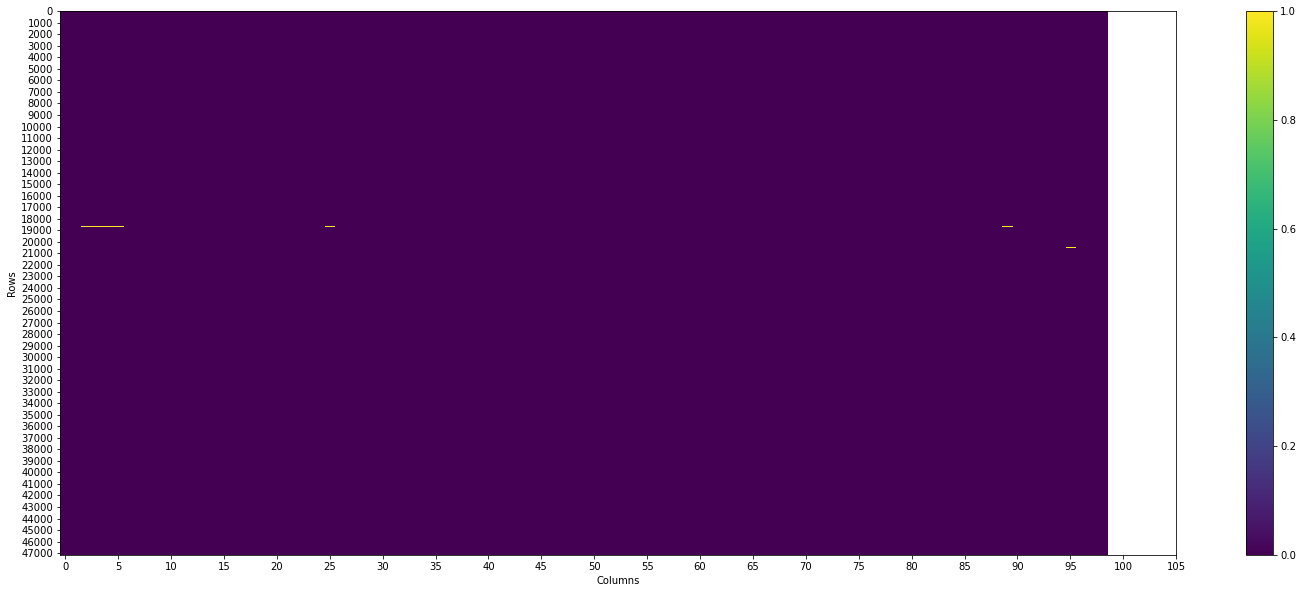

In [239]:
plt.figure(figsize=(25, 10))
plt.imshow(
    merge_sorted.isna(),
    aspect="auto",
    interpolation="nearest",
    cmap="viridis",
)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.colorbar()
plt.xticks(np.arange(0, 110, 5))
plt.yticks(np.arange(0, 48000, 1000))
plt.show()

In [240]:
merge_sorted.isna().sum()

geo_code                                                       0
year                                                           0
geo_full_name                                                  3
geo_name                                                       3
state                                                          3
state_code                                                     3
access_to_exercise_opportunities                               8
adult_obesity                                                  0
adult_smoking                                                  0
air_pollution_particulate_matter                              26
alcohol_impaired_driving_deaths                                8
children_eligible_for_free_lunch                               0
children_in_poverty                                           21
children_in_single_parent_households                          16
college_completion                                             0
dentists                 

In [241]:
merge_sorted.to_csv('chr_census_dataset_2010_2024.csv')

In [243]:
merge_sorted.columns.tolist()

['geo_code',
 'year',
 'geo_full_name',
 'geo_name',
 'state',
 'state_code',
 'access_to_exercise_opportunities',
 'adult_obesity',
 'adult_smoking',
 'air_pollution_particulate_matter',
 'alcohol_impaired_driving_deaths',
 'children_eligible_for_free_lunch',
 'children_in_poverty',
 'children_in_single_parent_households',
 'college_completion',
 'dentists',
 'diabetes_prevalence',
 'drinking_water_violations',
 'driving_alone_to_work',
 'excessive_drinking',
 'food_environment_index',
 'food_insecurity',
 'frequent_mental_distress',
 'gender_pay_gap',
 'gini_index',
 'high_school_completion',
 'high_school_graduation',
 'hiv_prevalence',
 'homeownership',
 'income_inequality',
 'injury_deaths',
 'insufficient_sleep',
 'life_expectancy',
 'limited_access_to_healthy_foods',
 'long_commute_driving_alone',
 'low_birthweight',
 'mammography_screening',
 'median_age',
 'median_household_income',
 'mental_health_providers',
 'motor_vehicle_crash_deaths',
 'other_pcp',
 'pcp',
 'pct_65_and_o

In [244]:
numerical = ['access_to_exercise_opportunities',
 'adult_obesity',
 'adult_smoking',
 'air_pollution_particulate_matter',
 'alcohol_impaired_driving_deaths',
 'children_eligible_for_free_lunch',
 'children_in_poverty',
 'children_in_single_parent_households',
 'college_completion',
 'dentists',
 'diabetes_prevalence',
 'drinking_water_violations',
 'driving_alone_to_work',
 'excessive_drinking',
 'food_environment_index',
 'food_insecurity',
 'frequent_mental_distress',
 'gender_pay_gap',
 'gini_index',
 'high_school_completion',
 'high_school_graduation',
 'hiv_prevalence',
 'homeownership',
 'income_inequality',
 'injury_deaths',
 'insufficient_sleep',
 'life_expectancy',
 'limited_access_to_healthy_foods',
 'long_commute_driving_alone',
 'low_birthweight',
 'mammography_screening',
 'median_age',
 'median_household_income',
 'mental_health_providers',
 'motor_vehicle_crash_deaths',
 'other_pcp',
 'pcp',
 'pct_65_and_older',
 'pct_aapi',
 'pct_agriculture_hunting_and_mining',
 'pct_arts_entertainment_and_accommodation_services',
 'pct_asian',
 'pct_construction',
 'pct_educational_and_health_services',
 'pct_female',
 'pct_finance_insurance_and_real_estate',
 'pct_hispanic',
 'pct_households_with_high_housing_costs',
 'pct_households_with_lack_of_kitchen_or_plumbing_facilities',
 'pct_households_with_overcrowding',
 'pct_indigenous',
 'pct_information',
 'pct_manufacturing',
 'pct_mgmt_bus_sci_art_occupations',
 'pct_nat_res_constr_maint_occupations',
 'pct_nhpi',
 'pct_non_hispanic_black',
 'pct_non_hispanic_white',
 'pct_not_proficient_in_english',
 'pct_other_services',
 'pct_prod_transp_mat_moving_occupations',
 'pct_professional_management_and_scientific_services',
 'pct_public_administration',
 'pct_retail_trade',
 'pct_rural',
 'pct_sales_and_office_occupations',
 'pct_service_occupations',
 'pct_transportation_and_utilities',
 'pct_under_18',
 'pct_wholesale_trade',
 'physical_inactivity',
 'poor_mental_health_days',
 'poor_or_fair_health',
 'poor_physical_health_days',
 'population',
 'poverty',
 'premature_age_adjusted_mortality',
 'premature_death',
 'preventable_hospital_stays',
 'ratio_of_pop_to_dentists',
 'ratio_of_pop_to_mental_health',
 'ratio_of_pop_to_pcp_other_than_physicians',
 'ratio_of_pop_to_pcp',
 'severe_housing_cost_burden',
 'severe_housing_problems',
 'sexually_transmitted_infections',
 'single_parent_households',
 'social_associations',
 'some_college',
 'teen_births',
 'unemployment_rate',
 'uninsured_adults',
 'violent_crime']

In [247]:
merge_sorted[numerical] = merge_sorted[numerical].applymap(lambda x: float(x))

merge_final = pd.concat([merge_sorted[["geo_code",
        "year",
        "geo_full_name",
        "geo_name",
        "state",
        "state_code"]], merge_sorted[numerical]], axis=1)

merge_final.head()

,geo_code,year,geo_full_name,geo_name,state,state_code,access_to_exercise_opportunities,adult_obesity,adult_smoking,air_pollution_particulate_matter,alcohol_impaired_driving_deaths,children_eligible_for_free_lunch,children_in_poverty,children_in_single_parent_households,college_completion,dentists,diabetes_prevalence,drinking_water_violations,driving_alone_to_work,excessive_drinking,food_environment_index,food_insecurity,frequent_mental_distress,gender_pay_gap,gini_index,high_school_completion,high_school_graduation,hiv_prevalence,homeownership,income_inequality,injury_deaths,insufficient_sleep,life_expectancy,limited_access_to_healthy_foods,long_commute_driving_alone,low_birthweight,mammography_screening,median_age,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,other_pcp,pcp,pct_65_and_older,pct_aapi,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_asian,pct_construction,pct_educational_and_health_services,pct_female,pct_finance_insurance_and_real_estate,pct_hispanic,pct_households_with_high_housing_costs,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,pct_indigenous,pct_information,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_nat_res_constr_maint_occupations,pct_nhpi,pct_non_hispanic_black,pct_non_hispanic_white,pct_not_proficient_in_english,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_rural,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_under_18,pct_wholesale_trade,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,population,poverty,premature_age_adjusted_mortality,premature_death,preventable_hospital_stays,ratio_of_pop_to_dentists,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp_other_than_physicians,ratio_of_pop_to_pcp,severe_housing_cost_burden,severe_housing_problems,sexually_transmitted_infections,single_parent_households,social_associations,some_college,teen_births,unemployment_rate,uninsured_adults,violent_crime
0,01001,2010,"Autauga County, Alabama",Autauga,Alabama,AL,0.6907,0.300,0.2814,12.5700,0.284338,0.161946,0.1380,0.2954,0.217477,0.000262,0.11818,0.000000,0.868566,0.154040,7.219912,0.13821,0.135139,66.048439,0.405,0.853323,0.715190,184.736484,0.775180,3.930128,72.504788,0.369589,75.607833,0.152482,31.206695,0.0883,0.658644,36.2,53255.0,0.000050,28.8,0.000248,52.224775,0.114006,0.006547,0.009449,0.086767,0.006547,0.077400,0.174315,0.515003,0.065322,0.023196,0.144260,0.009737,0.002029,0.002897,0.011257,0.141284,0.293291,0.115690,0.000000,0.178215,0.775524,0.009389,0.045520,0.131096,0.069964,0.116676,0.126659,0.441005,0.290703,0.169221,0.044246,0.277020,0.031141,0.32180,4.14,0.2586,5.48,53155.0,0.214724,441.808519,9778.1,91.803383,4120.317674,37113.103370,5074.504751,1914.800000,0.144260,0.096612,370.0,0.179785,13.455842,0.501062,47.513321,0.062076,0.140,256.487012
1,01003,2010,"Baldwin County, Alabama",Baldwin,Alabama,AL,0.6523,0.245,0.2309,11.5998,0.321341,0.204360,0.1933,0.2852,0.268221,0.000464,0.10766,0.253189,0.835134,0.190255,7.651281,0.13214,0.136337,68.766137,0.439,0.875757,0.670437,177.725095,0.767301,4.214440,74.283360,0.335911,77.707111,0.037806,33.724273,0.0877,0.688273,41.0,50147.0,0.000326,23.6,0.000399,70.741370,0.164912,0.006570,0.018619,0.095237,0.006536,0.107106,0.179215,0.511340,0.068492,0.038955,0.174773,0.011083,0.004721,0.006064,0.017320,0.092078,0.315219,0.134832,0.000034,0.093793,0.840777,0.022074,0.049300,0.105578,0.098688,0.045950,0.137723,0.500277,0.268785,0.175586,0.053540,0.233084,0.036729,0.25185,4.06,0.1338,3.57,175791.0,0.130669,366.591291,8221.7,65.391299,2177.442032,4917.923172,2746.755160,1413.600000,0.174773,0.116501,245.9,0.138206,11.480511,0.576810,31.854171,0.065605,0.209,171.623233
2,01005,2010,"Barbour County, Alabama",Barbour,Alabama,AL,0.3645,0.364,0.226

# Final KNN Imputation

In [249]:
df = pd.concat([merge_sorted[["geo_code", "year"]], merge_sorted[numerical]], axis=1)

data_pivot = df.pivot_table(index="geo_code", columns="year", values=numerical)

# Apply KNN imputation (k=3)
knn_imputer = KNN(k=3)
df_knn = pd.DataFrame(
    knn_imputer.fit_transform(data_pivot), columns=data_pivot.columns
)

df_knn.set_index(data_pivot.index, inplace=True)
df_knn = df_knn.stack().reset_index()
df_knn.head()

Imputing row 1/3147 with 0 missing, elapsed time: 26.030
Imputing row 101/3147 with 0 missing, elapsed time: 26.069
Imputing row 201/3147 with 0 missing, elapsed time: 26.069
Imputing row 301/3147 with 0 missing, elapsed time: 26.070
Imputing row 401/3147 with 0 missing, elapsed time: 26.070
Imputing row 501/3147 with 0 missing, elapsed time: 26.070
Imputing row 601/3147 with 0 missing, elapsed time: 26.072
Imputing row 701/3147 with 0 missing, elapsed time: 26.073
Imputing row 801/3147 with 0 missing, elapsed time: 26.073
Imputing row 901/3147 with 0 missing, elapsed time: 26.073
Imputing row 1001/3147 with 0 missing, elapsed time: 26.074
Imputing row 1101/3147 with 0 missing, elapsed time: 26.074
Imputing row 1201/3147 with 0 missing, elapsed time: 26.074
Imputing row 1301/3147 with 0 missing, elapsed time: 26.075
Imputing row 1401/3147 with 0 missing, elapsed time: 26.075
Imputing row 1501/3147 with 0 missing, elapsed time: 26.076
Imputing row 1601/3147 with 0 missing, elapsed time:

,geo_code,year,access_to_exercise_opportunities,adult_obesity,adult_smoking,air_pollution_particulate_matter,alcohol_impaired_driving_deaths,children_eligible_for_free_lunch,children_in_poverty,children_in_single_parent_households,college_completion,dentists,diabetes_prevalence,drinking_water_violations,driving_alone_to_work,excessive_drinking,food_environment_index,food_insecurity,frequent_mental_distress,gender_pay_gap,gini_index,high_school_completion,high_school_graduation,hiv_prevalence,homeownership,income_inequality,injury_deaths,insufficient_sleep,life_expectancy,limited_access_to_healthy_foods,long_commute_driving_alone,low_birthweight,mammography_screening,median_age,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,other_pcp,pcp,pct_65_and_older,pct_aapi,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_asian,pct_construction,pct_educational_and_health_services,pct_female,pct_finance_insurance_and_real_estate,pct_hispanic,pct_households_with_high_housing_costs,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,pct_indigenous,pct_information,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_nat_res_constr_maint_occupations,pct_nhpi,pct_non_hispanic_black,pct_non_hispanic_white,pct_not_proficient_in_english,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_rural,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_under_18,pct_wholesale_trade,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,population,poverty,premature_age_adjusted_mortality,premature_death,preventable_hospital_stays,ratio_of_pop_to_dentists,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp,ratio_of_pop_to_pcp_other_than_physicians,severe_housing_cost_burden,severe_housing_problems,sexually_transmitted_infections,single_parent_households,social_associations,some_college,teen_births,unemployment_rate,uninsured_adults,violent_crime
0,01001,2010,0.6907,0.300,0.2814,12.5700,0.284338,0.161946,0.1380,0.2954,0.217477,0.000262,0.11818,0.0,0.868566,0.15404,7.219912,0.13821,0.135139,66.048439,0.4050,0.853323,0.71519,184.736484,0.775180,3.930128,72.504788,0.369589,75.607833,0.152482,31.206695,0.0883,0.658644,36.2,53255.0,0.000050,28.800000,0.000248,52.224775,0.114006,0.006547,0.009449,0.086767,0.006547,0.077400,0.174315,0.515003,0.065322,0.023196,0.144260,0.009737,0.002029,0.002897,0.011257,0.141284,0.293291,0.115690,0.0,0.178215,0.775524,0.009389,0.045520,0.131096,0.069964,0.116676,0.126659,0.441005,0.290703,0.169221,0.044246,0.277020,0.031141,0.3218,4.14,0.2586,5.48,53155.0,0.214724,441.808519,9778.10,91.803383,4120.317674,37113.103370,1914.800000,5074.504751,0.144260,0.096612,370.0,0.179785,13.455842,0.501062,47.513321,0.062076,0.140000,256.487012
1,01001,2011,0.6538,0.315,0.2740,12.6139,0.282989,0.288000,0.1490,0.2647,0.216246,0.000247,0.11400,0.0,0.873219,0.14100,7.207364,0.13897,0.138409,65.685521,0.4065,0.864521,0.74000,169.900000,0.777478,3.899220,71.586066,0.369429,75.400943,0.161243,31.917751,0.0945,0.695122,36.4,51622.0,0.000020,28.300000,0.000243,0.000437,0.116547,0.007137,0.012469,0.081611,0.007137,0.069804,0.183148,0.514793,0.061602,0.024062,0.158913,0.011501,0.002000,0.001891,0.009942,0.139650,0.311695,0.107171,0.0,0.179668,0.772153,0.010779,0.044285,0.143751,0.070508,0.112722,0.124984,0.448000,0.275612,0.161771,0.052985,0.272653,0.036290,0.3270,4.10,0.2580,5.20,53944.0,0.183035,444.343925,9967.40,78.853600,4179.323872,50354.000000,2288.818182,5131.809385,0.158913,0.098860,307.8,0.170717,13.473146,0.514242,42.572062,0.075488,0.155000,256.300000
2,01001,2012,0.6532,0.341,0.2460,12.6420,0.283750,0.288000,0.1598,0.3012,0.217078,0.000210,0.12300,0.0,0.877878,0.15900,7.201364,0.13778,0.137612,63.094541,0.4122,0.851127,0.84500,185.320000,0.776964,4.037353,71.6

In [250]:
df_knn.isna().sum()

geo_code                                                      0
year                                                          0
access_to_exercise_opportunities                              0
adult_obesity                                                 0
adult_smoking                                                 0
air_pollution_particulate_matter                              0
alcohol_impaired_driving_deaths                               0
children_eligible_for_free_lunch                              0
children_in_poverty                                           0
children_in_single_parent_households                          0
college_completion                                            0
dentists                                                      0
diabetes_prevalence                                           0
drinking_water_violations                                     0
driving_alone_to_work                                         0
excessive_drinking                      

In [253]:
merge_final = merge_sorted[["geo_code",
                            "year",
                            "geo_full_name",
                            "geo_name",
                            "state",
                            "state_code"]].merge(df_knn, on=['geo_code', 'year'], how='left')

merge_final.head()

,geo_code,year,geo_full_name,geo_name,state,state_code,access_to_exercise_opportunities,adult_obesity,adult_smoking,air_pollution_particulate_matter,alcohol_impaired_driving_deaths,children_eligible_for_free_lunch,children_in_poverty,children_in_single_parent_households,college_completion,dentists,diabetes_prevalence,drinking_water_violations,driving_alone_to_work,excessive_drinking,food_environment_index,food_insecurity,frequent_mental_distress,gender_pay_gap,gini_index,high_school_completion,high_school_graduation,hiv_prevalence,homeownership,income_inequality,injury_deaths,insufficient_sleep,life_expectancy,limited_access_to_healthy_foods,long_commute_driving_alone,low_birthweight,mammography_screening,median_age,median_household_income,mental_health_providers,motor_vehicle_crash_deaths,other_pcp,pcp,pct_65_and_older,pct_aapi,pct_agriculture_hunting_and_mining,pct_arts_entertainment_and_accommodation_services,pct_asian,pct_construction,pct_educational_and_health_services,pct_female,pct_finance_insurance_and_real_estate,pct_hispanic,pct_households_with_high_housing_costs,pct_households_with_lack_of_kitchen_or_plumbing_facilities,pct_households_with_overcrowding,pct_indigenous,pct_information,pct_manufacturing,pct_mgmt_bus_sci_art_occupations,pct_nat_res_constr_maint_occupations,pct_nhpi,pct_non_hispanic_black,pct_non_hispanic_white,pct_not_proficient_in_english,pct_other_services,pct_prod_transp_mat_moving_occupations,pct_professional_management_and_scientific_services,pct_public_administration,pct_retail_trade,pct_rural,pct_sales_and_office_occupations,pct_service_occupations,pct_transportation_and_utilities,pct_under_18,pct_wholesale_trade,physical_inactivity,poor_mental_health_days,poor_or_fair_health,poor_physical_health_days,population,poverty,premature_age_adjusted_mortality,premature_death,preventable_hospital_stays,ratio_of_pop_to_dentists,ratio_of_pop_to_mental_health,ratio_of_pop_to_pcp,ratio_of_pop_to_pcp_other_than_physicians,severe_housing_cost_burden,severe_housing_problems,sexually_transmitted_infections,single_parent_households,social_associations,some_college,teen_births,unemployment_rate,uninsured_adults,violent_crime
0,01001,2010,"Autauga County, Alabama",Autauga,Alabama,AL,0.6907,0.300,0.2814,12.5700,0.284338,0.161946,0.1380,0.2954,0.217477,0.000262,0.11818,0.000000,0.868566,0.154040,7.219912,0.13821,0.135139,66.048439,0.405,0.853323,0.715190,184.736484,0.775180,3.930128,72.504788,0.369589,75.607833,0.152482,31.206695,0.0883,0.658644,36.2,53255.0,0.000050,28.8,0.000248,52.224775,0.114006,0.006547,0.009449,0.086767,0.006547,0.077400,0.174315,0.515003,0.065322,0.023196,0.144260,0.009737,0.002029,0.002897,0.011257,0.141284,0.293291,0.115690,0.000000,0.178215,0.775524,0.009389,0.045520,0.131096,0.069964,0.116676,0.126659,0.441005,0.290703,0.169221,0.044246,0.277020,0.031141,0.32180,4.14,0.2586,5.48,53155.0,0.214724,441.808519,9778.1,91.803383,4120.317674,37113.103370,1914.800000,5074.504751,0.144260,0.096612,370.0,0.179785,13.455842,0.501062,47.513321,0.062076,0.140,256.487012
1,01003,2010,"Baldwin County, Alabama",Baldwin,Alabama,AL,0.6523,0.245,0.2309,11.5998,0.321341,0.204360,0.1933,0.2852,0.268221,0.000464,0.10766,0.253189,0.835134,0.190255,7.651281,0.13214,0.136337,68.766137,0.439,0.875757,0.670437,177.725095,0.767301,4.214440,74.283360,0.335911,77.707111,0.037806,33.724273,0.0877,0.688273,41.0,50147.0,0.000326,23.6,0.000399,70.741370,0.164912,0.006570,0.018619,0.095237,0.006536,0.107106,0.179215,0.511340,0.068492,0.038955,0.174773,0.011083,0.004721,0.006064,0.017320,0.092078,0.315219,0.134832,0.000034,0.093793,0.840777,0.022074,0.049300,0.105578,0.098688,0.045950,0.137723,0.500277,0.268785,0.175586,0.053540,0.233084,0.036729,0.25185,4.06,0.1338,3.57,175791.0,0.130669,366.591291,8221.7,65.391299,2177.442032,4917.923172,1413.600000,2746.755160,0.174773,0.116501,245.9,0.138206,11.480511,0.576810,31.854171,0.065605,0.209,171.623233
2,01005,2010,"Barbour County, Alabama",Barbour,Alabama,AL,0.3645,0.364,0.226

In [254]:
merge_final.to_csv('chr_census_2010_2024.csv')